In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\courses\AI All\Amit Machin Learning\titanic.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
pd.set_option('display.max_rows',None)
print(df.value_counts().unique)

<bound method Series.unique of PassengerId  Survived  Pclass  Name                                                                                Sex     Age    SibSp  Parch  Ticket             Fare      Cabin            Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 female  38.00  1      0      PC 17599           71.2833   C85              C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)                                       female  53.00  2      0      11769              51.4792   C101             S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)                                           female  39.00  1      0      13507              55.9000   E44              S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)                                female  39.00  1      1      17421         

# Some Analsyis

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe(include = 'all').T

count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
PassengerId  257.353842   1.0   223.5    446.0  668.5     891.0  
Survived       0.486592   0.0     0.0      0.0    1.0       1.0  
Pclass         0.836071   1.0     2.0      3.0    3.0       3.0  
Name                NaN   NaN     NaN      NaN    NaN       NaN  
Sex                 NaN   NaN     NaN      NaN    NaN       NaN  
Age           14.526497  0.42  20.125     28.0   38.0      80.0  
SibSp          1.102743   0.0     0.0      0.0    1.0       8.0  
Parch          0.806057   0.0     0.0      0.0    0.0       6.0  
Ticket              NaN   NaN     NaN      NaN    NaN       NaN  
Fare          49.693429   0.0  7.9104  14.4542   31.0  512.3292  
Cabin               NaN   NaN     NaN      NaN    NaN       NaN  
Embarked            NaN   NaN     NaN      NaN    NaN       NaN

<AxesSubplot:>

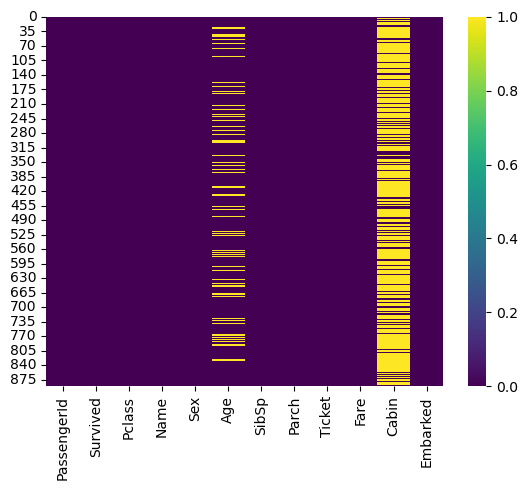

In [6]:
sns.heatmap(df.isnull(),cmap = 'viridis')

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop(['Cabin'],axis = 1,inplace = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df['Age'] = imputer.fit_transform(df[['Age']])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'].replace(np.nan,'S',inplace = True)
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [15]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [16]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [17]:
df['Ticket'].value_counts()

347082                7
CA. 2343              7
1601                  7
3101295               6
CA 2144               6
347088                6
S.O.C. 14879          5
382652                5
LINE                  4
PC 17757              4
17421                 4
349909                4
113760                4
4133                  4
113781                4
W./C. 6608            4
2666                  4
19950                 4
347077                4
C.A. 31921            3
PC 17572              3
C.A. 34651            3
363291                3
F.C.C. 13529          3
345773                3
248727                3
24160                 3
29106                 3
SC/Paris 2123         3
35273                 3
371110                3
230080                3
PC 17760              3
239853                3
PC 17582              3
347742                3
110152                3
13502                 3
110413                3
PC 17755              3
PC 17558              2
237736          

In [18]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [19]:
print('mean is : ',df["Age"].mean())
print('median is : ',df[["Age", "Fare"]].median())

mean is :  29.699117647058763
median is :  Age     29.699118
Fare    14.454200
dtype: float64


In [20]:
print('Age max is : ',df["Age"].max())
print('Age min is : ',df["Age"].min())

Age max is :  80.0
Age min is :  0.42


# minimum is 0.42 in Age is a wrong data so 

In [21]:
index = df[df['Age'] == 0.42].index
index

Int64Index([803], dtype='int64')

In [22]:
df.drop(index,axis=0,inplace = True)

In [24]:
above_35 = df[df["Age"] > 35]
above_35.shape

(217, 11)

In [28]:
print(above_35.columns)
print('length is : ',len(above_35))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
length is :  217


In [31]:
df.mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_21372\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


PassengerId    445.597753
Survived         0.383146
Pclass           2.307865
Age             29.732016
SibSp            0.523596
Parch            0.380899
Fare            32.230823
dtype: float64

In [38]:
class_23 = df[df["Pclass"].isin([2, 3])]
print('length is : ',len(class_23))
class_23

length is :  674


PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
4              5         0       3   
5              6         0       3   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
24            25         0       3   
25            26         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
32            33         1       3   
33            34         0       2   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
53            54         1       2   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
63            64         0       3   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
89            90         0       3   
90            91         0       3   
91            92         0       3   
93            94         0       3   
94            95         0       3   
95            96         0       3   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
103          104         0       3   
104          105         0       3   
105          106         0       3   
106          107         1       3   
107          108         1       3   
108          109         0       3   
109          110         1       3   
111          112         0       3   
112          113         0       3   
113          114         0       3   
114          115         0       3   
115          116         0       3   
116          117         0       3   
117          118         0       2   
119          120         0       3   
120          121         0       2   
121          122         0       3   
122          123         0       2   
123          124         1       2   
125          126         1       3   
126          127         0       3   
127          128         1       3   
128          129         1       3   
129          13

In [43]:
s1 = pd.Series(df['Fare'], index = pd.date_range(21.0750, periods=len(df['Fare'])))
s1

1970-01-01 00:00:00.000000021   NaN
1970-01-02 00:00:00.000000021   NaN
1970-01-03 00:00:00.000000021   NaN
1970-01-04 00:00:00.000000021   NaN
1970-01-05 00:00:00.000000021   NaN
1970-01-06 00:00:00.000000021   NaN
1970-01-07 00:00:00.000000021   NaN
1970-01-08 00:00:00.000000021   NaN
1970-01-09 00:00:00.000000021   NaN
1970-01-10 00:00:00.000000021   NaN
1970-01-11 00:00:00.000000021   NaN
1970-01-12 00:00:00.000000021   NaN
1970-01-13 00:00:00.000000021   NaN
1970-01-14 00:00:00.000000021   NaN
1970-01-15 00:00:00.000000021   NaN
1970-01-16 00:00:00.000000021   NaN
1970-01-17 00:00:00.000000021   NaN
1970-01-18 00:00:00.000000021   NaN
1970-01-19 00:00:00.000000021   NaN
1970-01-20 00:00:00.000000021   NaN
1970-01-21 00:00:00.000000021   NaN
1970-01-22 00:00:00.000000021   NaN
1970-01-23 00:00:00.000000021   NaN
1970-01-24 00:00:00.000000021   NaN
1970-01-25 00:00:00.000000021   NaN
1970-01-26 00:00:00.000000021   NaN
1970-01-27 00:00:00.000000021   NaN
1970-01-28 00:00:00.00000002

In [44]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

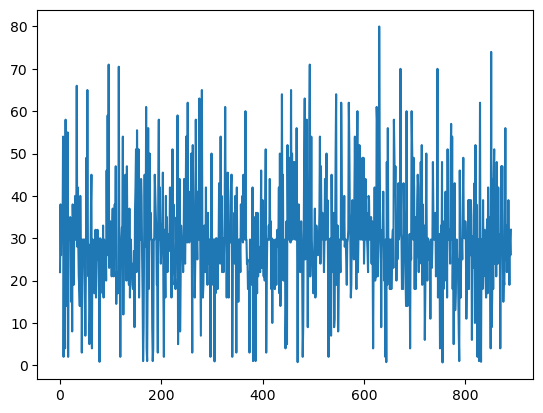

In [48]:
df['Age'].plot()
plt.show()

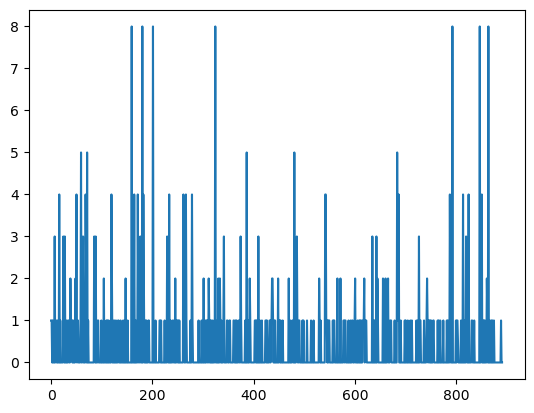

In [49]:
df['SibSp'].plot()
plt.show()

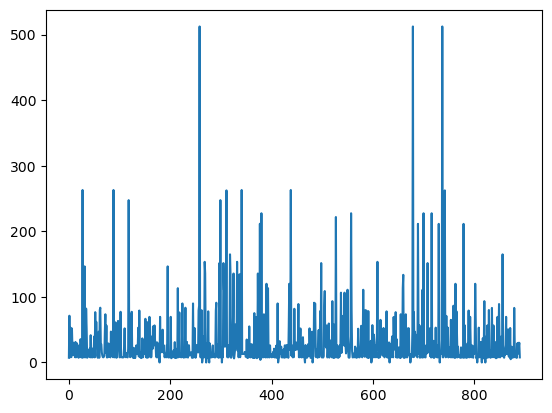

In [50]:
df['Fare'].plot()
plt.show()

In [52]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [54]:
feature = df[['Pclass','Age','SibSp','Fare']]
feature.apply(lambda x: x.max() - x.min())

Pclass      2.0000
Age        79.3300
SibSp       8.0000
Fare      512.3292
dtype: float64

In [55]:
df.groupby("Pclass")[["SibSp", "Fare"]].sum()

SibSp        Fare
Pclass                   
1          90  18177.4125
2          74   3801.8417
3         302   6706.1784

In [56]:
df[["Sex", "Age"]].groupby("Sex").mean()

Age
Sex              
female  28.216730
male    30.558057

In [57]:
df.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.673612
Name: Fare, dtype: float64

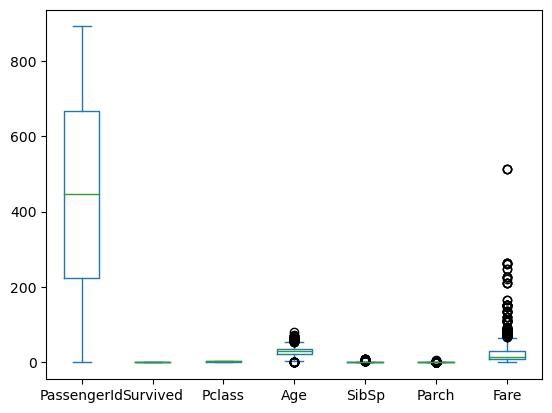

In [58]:
df.plot.box()
plt.show()

In [59]:
stacked = df.stack()
stacked

0    PassengerId                                                    1
     Survived                                                       0
     Pclass                                                         3
     Name                                     Braund, Mr. Owen Harris
     Sex                                                         male
     Age                                                         22.0
     SibSp                                                          1
     Parch                                                          0
     Ticket                                                 A/5 21171
     Fare                                                        7.25
     Embarked                                                       S
1    PassengerId                                                    2
     Survived                                                       1
     Pclass                                                         1
     Name           

In [60]:
stacked.unstack()

PassengerId Survived Pclass  \
0             1        0      3   
1             2        1      1   
2             3        1      3   
3             4        1      1   
4             5        0      3   
5             6        0      3   
6             7        0      1   
7             8        0      3   
8             9        1      3   
9            10        1      2   
10           11        1      3   
11           12        1      1   
12           13        0      3   
13           14        0      3   
14           15        0      3   
15           16        1      2   
16           17        0      3   
17           18        1      2   
18           19        0      3   
19           20        1      3   
20           21        0      2   
21           22        1      2   
22           23        1      3   
23           24        1      1   
24           25        0      3   
25           26        1      3   
26           27        0      3   
27           28        0      1   
28           29        1      3   
29           30        0      3   
30           31        0      1   
31           32        1      1   
32           33        1      3   
33           34        0      2   
34           35        0      1   
35           36        0      1   
36           37        1      3   
37           38        0      3   
38           39        0      3   
39           40        1      3   
40           41        0      3   
41           42        0      2   
42           43        0      3   
43           44        1      2   
44           45        1      3   
45           46        0      3   
46           47        0      3   
47           48        1      3   
48           49        0      3   
49           50        0      3   
50           51        0      3   
51           52        0      3   
52           53        1      1   
53           54        1      2   
54           55        0      1   
55           56        1      1   
56           57        1      2   
57           58        0      3   
58           59        1      2   
59           60        0      3   
60           61        0      3   
61           62        1      1   
62           63        0      1   
63           64        0      3   
64           65        0      1   
65           66        1      3   
66           67        1      2   
67           68        0      3   
68           69        1      3   
69           70        0      3   
70           71        0      2   
71           72        0      3   
72           73        0      2   
73           74        0      3   
74           75        1      3   
75           76        0      3   
76           77        0      3   
77           78        0      3   
78           79        1      2   
79           80        1      3   
80           81        0      3   
81           82        1      3   
82           83        1      3   
83           84        0      1   
84           85        1      2   
85           86        1      3   
86           87        0      3   
87           88        0      3   
88           89        1      1   
89           90        0      3   
90           91        0      3   
91           92        0      3   
92           93        0      1   
93           94        0      3   
94           95        0      3   
95           96        0      3   
96           97        0      1   
97           98        1      1   
98           99        1      2   
99          100        0      2   
100         101        0      3   
101         102        0      3   
102         103        0      1   
103         104        0      3   
104         105        0      3   
105         106        0      3   
106         107        1      3   
107         108        1      3   
108         109        0      3   
109         110        1      3   
110         111        0      1   
111         112        0      3   
112         113        0      3   
113         11

In [61]:
stacked.unstack(1)

PassengerId Survived Pclass  \
0             1        0      3   
1             2        1      1   
2             3        1      3   
3             4        1      1   
4             5        0      3   
5             6        0      3   
6             7        0      1   
7             8        0      3   
8             9        1      3   
9            10        1      2   
10           11        1      3   
11           12        1      1   
12           13        0      3   
13           14        0      3   
14           15        0      3   
15           16        1      2   
16           17        0      3   
17           18        1      2   
18           19        0      3   
19           20        1      3   
20           21        0      2   
21           22        1      2   
22           23        1      3   
23           24        1      1   
24           25        0      3   
25           26        1      3   
26           27        0      3   
27           28        0      1   
28           29        1      3   
29           30        0      3   
30           31        0      1   
31           32        1      1   
32           33        1      3   
33           34        0      2   
34           35        0      1   
35           36        0      1   
36           37        1      3   
37           38        0      3   
38           39        0      3   
39           40        1      3   
40           41        0      3   
41           42        0      2   
42           43        0      3   
43           44        1      2   
44           45        1      3   
45           46        0      3   
46           47        0      3   
47           48        1      3   
48           49        0      3   
49           50        0      3   
50           51        0      3   
51           52        0      3   
52           53        1      1   
53           54        1      2   
54           55        0      1   
55           56        1      1   
56           57        1      2   
57           58        0      3   
58           59        1      2   
59           60        0      3   
60           61        0      3   
61           62        1      1   
62           63        0      1   
63           64        0      3   
64           65        0      1   
65           66        1      3   
66           67        1      2   
67           68        0      3   
68           69        1      3   
69           70        0      3   
70           71        0      2   
71           72        0      3   
72           73        0      2   
73           74        0      3   
74           75        1      3   
75           76        0      3   
76           77        0      3   
77           78        0      3   
78           79        1      2   
79           80        1      3   
80           81        0      3   
81           82        1      3   
82           83        1      3   
83           84        0      1   
84           85        1      2   
85           86        1      3   
86           87        0      3   
87           88        0      3   
88           89        1      1   
89           90        0      3   
90           91        0      3   
91           92        0      3   
92           93        0      1   
93           94        0      3   
94           95        0      3   
95           96        0      3   
96           97        0      1   
97           98        1      1   
98           99        1      2   
99          100        0      2   
100         101        0      3   
101         102        0      3   
102         103        0      1   
103         104        0      3   
104         105        0      3   
105         106        0      3   
106         107        1      3   
107         108        1      3   
108         109        0      3   
109         110        1      3   
110         111        0      1   
111         112        0      3   
112         113        0      3   
113         11

In [62]:
stacked.unstack(0)

0    \
PassengerId                        1   
Survived                           0   
Pclass                             3   
Name         Braund, Mr. Owen Harris   
Sex                             male   
Age                             22.0   
SibSp                              1   
Parch                              0   
Ticket                     A/5 21171   
Fare                            7.25   
Embarked                           S   

                                                           1    \
PassengerId                                                  2   
Survived                                                     1   
Pclass                                                       1   
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...   
Sex                                                     female   
Age                                                       38.0   
SibSp                                                        1   
Parch                                                        0   
Ticket                                                PC 17599   
Fare                                                   71.2833   
Embarked                                                     C   

                                2    \
PassengerId                       3   
Survived                          1   
Pclass                            3   
Name         Heikkinen, Miss. Laina   
Sex                          female   
Age                            26.0   
SibSp                             0   
Parch                             0   
Ticket             STON/O2. 3101282   
Fare                          7.925   
Embarked                          S   

                                                      3    \
PassengerId                                             4   
Survived                                                1   
Pclass                                                  1   
Name         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Sex                                                female   
Age                                                  35.0   
SibSp                                                   1   
Parch                                                   0   
Ticket                                             113803   
Fare                                                 53.1   
Embarked                                                S   

                                  4                 5    \
PassengerId                         5                 6   
Survived                            0                 0   
Pclass                              3                 3   
Name         Allen, Mr. William Henry  Moran, Mr. James   
Sex                              male              male   
Age                              35.0         29.699118   
SibSp                               0                 0   
Parch                               0                 0   
Ticket                         373450            330877   
Fare                             8.05            8.4583   
Embarked                            S                 Q   

                                 6                               7    \
PassengerId                        7                               8   
Survived                           0                               0   
Pclass                             1                               3   
Name         McCarthy, Mr. Timothy J  Palsson, Master. Gosta Leonard   
Sex                             male                            male   
Age                             54.0                             2.0   
SibSp                              0                               3   
Parch                              0                               1   
Ticket                         17463                          349909   
Fare                         51.8625                          21.075   
Embarked                           S                    

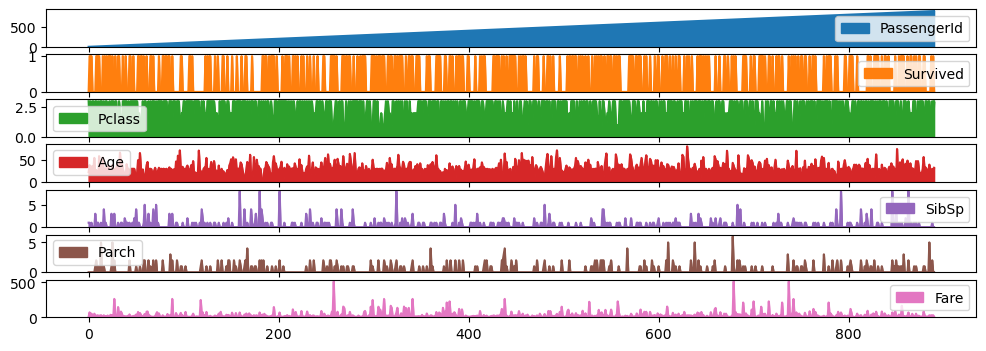

In [63]:
axs = df.plot.area(figsize=(12, 4), subplots=True)

plt.show()

In [64]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [68]:
pd.pivot_table(df, values="Pclass", index=["Fare", "Sex"], columns=["Survived"])

Survived                0    1
Fare     Sex                  
0.0000   male    1.857143  3.0
4.0125   male    3.000000  NaN
5.0000   male    1.000000  NaN
6.2375   male    3.000000  NaN
6.4375   male    3.000000  NaN
6.4500   male    3.000000  NaN
6.4958   male    3.000000  NaN
6.7500   female  3.000000  NaN
         male    3.000000  NaN
6.8583   male    3.000000  NaN
6.9500   male    3.000000  NaN
6.9750   male    3.000000  3.0
7.0458   male    3.000000  NaN
7.0500   male    3.000000  NaN
7.0542   male    3.000000  NaN
7.1250   male    3.000000  NaN
7.1417   male         NaN  3.0
7.2250   female       NaN  3.0
         male    3.000000  3.0
7.2292   female       NaN  3.0
         male    3.000000  3.0
7.2500   female       NaN  3.0
         male    3.000000  NaN
7.3125   male    3.000000  NaN
7.4958   female       NaN  3.0
         male    3.000000  NaN
7.5208   male    3.000000  NaN
7.5500   female  3.000000  3.0
         male    3.000000  NaN
7.6292   female  3.000000  NaN
7.6500   female       NaN  3.0
         male    3.000000  NaN
7.7250   male    3.000000  NaN
7.7292   male    3.000000  NaN
7.7333   female       NaN  3.0
         male    3.000000  NaN
7.7375   female       NaN  3.0
         male    3.000000  NaN
7.7417   male    3.000000  NaN
7.7500   female  3.000000  3.0
         male    3.000000  3.0
7.7750   female  3.000000  3.0
         male    3.000000  3.0
7.7875   female       NaN  3.0
7.7958   male    3.000000  3.0
7.8000   male    3.000000  NaN
7.8292   female       NaN  3.0
         male    3.000000  NaN
7.8542   female  3.000000  3.0
         male    3.000000  3.0
7.8750   male    3.000000  NaN
7.8792   female       NaN  3.0
7.8875   male    3.000000  NaN
7.8958   female  3.000000  NaN
         male    3.000000  3.0
7.9250   female  3.000000  3.0
         male    3.000000  3.0
8.0292   female       NaN  3.0
8.0500   female  3.000000  NaN
         male    3.000000  3.0
8.1125   male         NaN  3.0
8.1375   female  3.000000  NaN
8.1583   male    3.000000  NaN
8.3000   male    3.000000  NaN
8.3625   male    3.000000  NaN
8.4042   male    3.000000  NaN
8.4333   male    3.000000  NaN
8.4583   male    3.000000  NaN
8.6542   male    3.000000  NaN
8.6625   female  3.000000  NaN
         male    3.000000  3.0
8.6833   female       NaN  3.0
8.7125   male    3.000000  NaN
8.8500   female  3.000000  NaN
9.0000   male    3.000000  NaN
9.2167   male    3.000000  NaN
9.2250   male    3.000000  NaN
9.3500   female       NaN  3.0
         male    3.000000  NaN
9.4750   female  3.000000  NaN
9.4833   male    3.000000  NaN
9.5000   male    3.000000  3.0
9.5875   female  3.000000  3.0
9.8250   female  3.000000  NaN
9.8375   female  3.000000  NaN
9.8417   female       NaN  3.0
9.8458   male    3.000000  NaN
10.1708  male    3.000000  NaN
10.4625  female  3.000000  NaN
10.5000  female  2.000000  2.0
         male    2.000000  2.0
10.5167  female  3.000000  NaN
11.1333  female       NaN  3.0
         male         NaN  3.0
11.2417  female       NaN  3.0
         male         NaN  3.0
11.5000  male    2.000000  NaN
12.0000  female       NaN  2.0
12.2750  male    2.000000  NaN
12.2875  female       NaN  3.0
12.3500  female       NaN  2.0
         male    2.000000  NaN
12.4750  female       NaN  3.0
         male         NaN  3.0
12.5250  male    2.000000  NaN
12.6500  female       NaN  2.0
12.8750  male    2.000000  NaN
13.0000  female  2.000000  2.0
         male    2.000000  2.0
13.4167  female       NaN  3.0
13.5000  female       NaN  2.0
         male    2.000000  NaN
13.7917  female       NaN  2.0
13.8583  female       NaN  2.0
13.8625  male         NaN  2.0
14.0000  male    2.000000  NaN
14.1083  male    3.000000  NaN
14.4000  female  3.000000  NaN
         male    3.000000  NaN
14.4542  female  3.000000  3.0
         male    3.000000  NaN
14.4583  female  3.000000  NaN
         male    3.000000  NaN
14.5000  female  3.000000  2.0
         male    3.000000  2.0
15.0000  male    2.000000  NaN
15.0458  male    2.000000  NaN
1

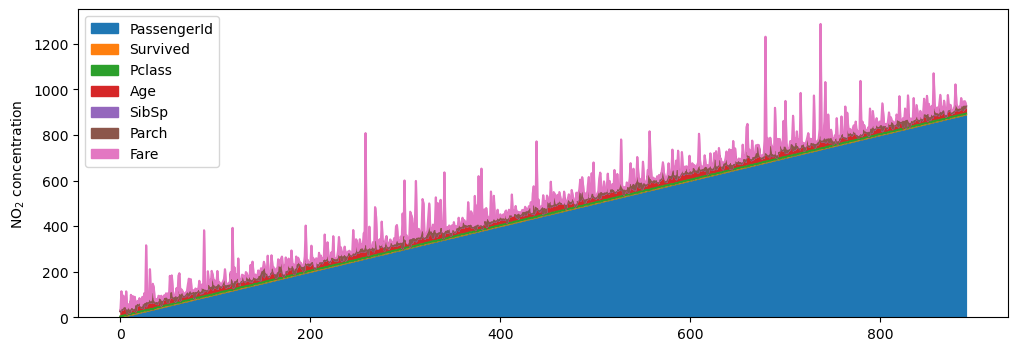

In [70]:
fig, axs = plt.subplots(figsize=(12, 4))        
df.plot.area(ax=axs)                   
axs.set_ylabel("NO$_2$ concentration")         
fig.savefig("no2_concentrations.png") 
plt.show()                                      

In [72]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [73]:
df.sort_values(by="Sex")
df.groupby("Sex").size()

Sex
female    314
male      576
dtype: int64

<Figure size 640x480 with 0 Axes>

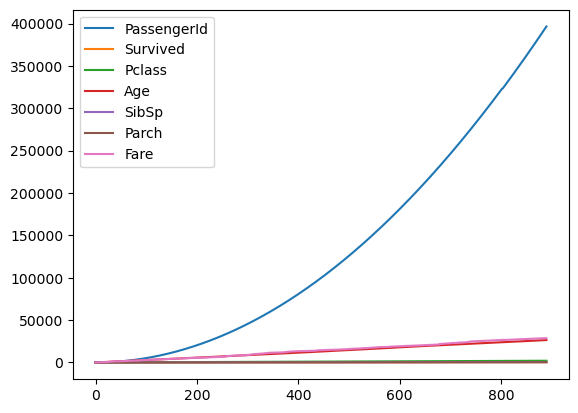

In [74]:
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [75]:
df.apply(np.cumsum)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              4         1       7   
2             10         3      14   
3             20         6      22   
4             35         9      33   
5             56        12      47   
6             84        15      62   
7            120        18      80   
8            165        22     101   
9            220        27     124   
10           286        33     150   
11           364        40     177   
12           455        47     207   
13           560        54     240   
14           680        61     276   
15           816        69     314   
16           969        77     355   
17          1140        86     398   
18          1330        95     444   
19          1540       105     493   
20          1771       115     544   
21          2024       126     597   
22          2300       138     653   
23          2600       151     710   
24          2925       164     770   
25          3276       178     833   
26          3654       192     899   
27          4060       206     966   
28          4495       221    1036   
29          4960       236    1109   
30          5456       251    1183   
31          5984       267    1258   
32          6545       284    1336   
33          7140       301    1416   
34          7770       318    1497   
35          8436       335    1579   
36          9139       353    1664   
37          9880       371    1752   
38         10660       389    1843   
39         11480       408    1937   
40         12341       427    2034   
41         13244       446    2133   
42         14190       465    2235   
43         15180       485    2339   
44         16215       506    2446   
45         17296       527    2556   
46         18424       548    2669   
47         19600       570    2785   
48         20825       592    2904   
49         22100       614    3026   
50         23426       636    3151   
51         24804       658    3279   
52         26235       681    3408   
53         27720       705    3539   
54         29260       729    3671   
55         30856       754    3804   
56         32509       780    3939   
57         34220       806    4077   
58         35990       833    4217   
59         37820       860    4360   
60         39711       887    4506   
61         41664       915    4653   
62         43680       943    4801   
63         45760       971    4952   
64         47905       999    5104   
65         50116      1028    5259   
66         52394      1058    5416   
67         54740      1088    5576   
68         57155      1119    5739   
69         59640      1150    5905   
70         62196      1181    6073   
71         64824      1212    6244   
72         67525      1243    6417   
73         70300      1274    6593   
74         73150      1306    6772   
75         76076      1338    6954   
76         79079      1370    7139   
77         82160      1402    7327   
78         85320      1435    7517   
79         88560      1469    7710   
80         91881      1503    7906   
81         95284      1538    8105   
82         98770      1574    8307   
83        102340      1610    8510   
84        105995      1647    8715   
85        109736      1685    8923   
86        113564      1723    9134   
87        117480      1761    9348   
88        121485      1800    9563   
89        125580      1839    9781   
90        129766      1878   10002   
91        134044      1917   10226   
92        138415      1956   10451   
93        142880      1995   10679   
94        147440      2034   10910   
95        152096      2073   11144   
96        156849      2112   11379   
97        161700      2152   11615   
98        166650      2193   11853   
99        171700      2234   12093   
100       176851      2275   12336   
101       182104      2316   12582   
102       187460      2357   12829   
103       192920      2398   13079   
104       19848

In [76]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            3         1       4   
2            6         2       7   
3           10         3       8   
4           15         3      11   

                                                Name  \
0                            Braund, Mr. Owen Harris   
1  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
2  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
3  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
4  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   

                          Sex    Age  SibSp  Parch  \
0                        male   22.0      1      0   
1                  malefemale   60.0      2      0   
2            malefemalefemale   86.0      2      0   
3      malefemalefemalefemale  121.0      3      0   
4  malefemalefemalefemalemale  156.0      3      0   

                                          Ticket      Fare Embarked  
0                                      A/5 21171    7.2500        S  
1                              A/5 21171PC 17599   78.5333       SC  
2              A/5 21171PC 17599STON/O2. 3101282   86.4583      SCS  
3        A/5 21171PC 17599STON/O2. 3101282113803  139.5583     SCSS  
4  A/5 21171PC 17599STON/O2. 3101282113803373450  147.6083    SCSSS

In [78]:
df.agg({"Age": ["min", "max", "median", "skew"],"Fare": ["min", "max", "median", "mean"],})

Age         Fare
min        22.000000      7.25000
max     26461.493824  28685.43260
median  12847.272353  14448.19535
skew        0.028423          NaN
mean             NaN  14186.61308

In [79]:
df.agg(["sum", "mean"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_21372\583996658.py:1: FutureWarning: ['Name', 'Sex', 'Ticket', 'Embarked'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(["sum", "mean"])


PassengerId       Survived         Pclass  \
sum   1.178950e+08  152692.000000  922039.000000   
mean  1.324663e+05     171.564045    1035.998876   

                                                   Name  \
sum   Braund, Mr. Owen HarrisBraund, Mr. Owen Harris...   
mean                                                NaN   

                                                    Sex           Age  \
sum   malemalefemalemalefemalefemalemalefemalefemale...  1.167914e+07   
mean                                                NaN  1.312263e+04   

              SibSp          Parch  \
sum   221949.000000  151555.000000   
mean     249.380899     170.286517   

                                                 Ticket          Fare  \
sum   A/5 21171A/5 21171PC 17599A/5 21171PC 17599STO...  1.262609e+07   
mean                                                NaN  1.418661e+04   

                                               Embarked  
sum   SSCSCSSCSSSCSSSSCSSSQSCSSSQSSCSSSQSSSCSSSQSSSS...  
mean                                                NaN

In [80]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            3         1       4   
2            6         2       7   
3           10         3       8   
4           15         3      11   

                                                Name  \
0                            Braund, Mr. Owen Harris   
1  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
2  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
3  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
4  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   

                          Sex    Age  SibSp  Parch  \
0                        male   22.0      1      0   
1                  malefemale   60.0      2      0   
2            malefemalefemale   86.0      2      0   
3      malefemalefemalefemale  121.0      3      0   
4  malefemalefemalefemalemale  156.0      3      0   

                                          Ticket      Fare Embarked  
0                                      A/5 21171    7.2500        S  
1                              A/5 21171PC 17599   78.5333       SC  
2              A/5 21171PC 17599STON/O2. 3101282   86.4583      SCS  
3        A/5 21171PC 17599STON/O2. 3101282113803  139.5583     SCSS  
4  A/5 21171PC 17599STON/O2. 3101282113803373450  147.6083    SCSSS

In [81]:
df["Fare"].agg(["sum", "mean"])

sum     1.262609e+07
mean    1.418661e+04
Name: Fare, dtype: float64

In [82]:
df["Fare"].agg(["sum", lambda x: x.mean()])

sum         1.262609e+07
<lambda>    1.418661e+04
Name: Fare, dtype: float64

In [83]:
df.agg({"Fare": ["mean", "min"], "Pclass": "sum"})

Fare    Pclass
mean  14186.61308       NaN
min       7.25000       NaN
sum           NaN  922039.0

In [84]:
df.assign(C=lambda x: x["Fare"] + x["SibSp"], D=lambda x: x["Fare"] + x["Parch"])

PassengerId  Survived  Pclass  \
0              1         0       3   
1              3         1       4   
2              6         2       7   
3             10         3       8   
4             15         3      11   
5             21         3      14   
6             28         3      15   
7             36         3      18   
8             45         4      21   
9             55         5      23   
10            66         6      26   
11            78         7      27   
12            91         7      30   
13           105         7      33   
14           120         7      36   
15           136         8      38   
16           153         8      41   
17           171         9      43   
18           190         9      46   
19           210        10      49   
20           231        10      51   
21           253        11      53   
22           276        12      56   
23           300        13      57   
24           325        13      60   
25           351        14      63   
26           378        14      66   
27           406        14      67   
28           435        15      70   
29           465        15      73   
30           496        15      74   
31           528        16      75   
32           561        17      78   
33           595        17      80   
34           630        17      81   
35           666        17      82   
36           703        18      85   
37           741        18      88   
38           780        18      91   
39           820        19      94   
40           861        19      97   
41           903        19      99   
42           946        19     102   
43           990        20     104   
44          1035        21     107   
45          1081        21     110   
46          1128        21     113   
47          1176        22     116   
48          1225        22     119   
49          1275        22     122   
50          1326        22     125   
51          1378        22     128   
52          1431        23     129   
53          1485        24     131   
54          1540        24     132   
55          1596        25     133   
56          1653        26     135   
57          1711        26     138   
58          1770        27     140   
59          1830        27     143   
60          1891        27     146   
61          1953        28     147   
62          2016        28     148   
63          2080        28     151   
64          2145        28     152   
65          2211        29     155   
66          2278        30     157   
67          2346        30     160   
68          2415        31     163   
69          2485        31     166   
70          2556        31     168   
71          2628        31     171   
72          2701        31     173   
73          2775        31     176   
74          2850        32     179   
75          2926        32     182   
76          3003        32     185   
77          3081        32     188   
78          3160        33     190   
79          3240        34     193   
80          3321        34     196   
81          3403        35     199   
82          3486        36     202   
83          3570        36     203   
84          3655        37     205   
85          3741        38     208   
86          3828        38     211   
87          3916        38     214   
88          4005        39     215   
89          4095        39     218   
90          4186        39     221   
91          4278        39     224   
92          4371        39     225   
93          4465        39     228   
94          4560        39     231   
95          4656        39     234   
96          4753        39     235   
97          4851        40     236   
98          4950        41     238   
99          5050        41     240   
100         5151        41     243   
101         5253        41     246   
102         5356        41     247   
103         5460        41     250   
104         556

In [86]:
np.exp(feature)

Pclass           Age        SibSp           Fare
0    20.085537  3.584913e+09     2.718282   1.408105e+03
1     2.718282  3.185593e+16     2.718282   9.077031e+30
2    20.085537  1.957296e+11     1.000000   2.765564e+03
3     2.718282  1.586013e+15     2.718282   1.150898e+23
4    20.085537  1.586013e+15     1.000000   3.133795e+03
5    20.085537  7.909753e+12     1.000000   4.714037e+03
6     2.718282  2.830753e+23     1.000000   3.338855e+22
7    20.085537  7.389056e+00    20.085537   1.421531e+09
8    20.085537  5.320482e+11     1.000000   6.841176e+04
9     7.389056  1.202604e+06     2.718282   1.147050e+13
10   20.085537  5.459815e+01     2.718282   1.789443e+07
11    2.718282  1.545539e+25     1.000000   3.392489e+11
12   20.085537  4.851652e+08     1.000000   3.133795e+03
13   20.085537  8.659340e+16     2.718282   3.824370e+13
14   20.085537  1.202604e+06     1.000000   2.576533e+03
15    7.389056  7.694785e+23     1.000000   8.886111e+06
16   20.085537  7.389056e+00    54.598150   4.454785e+12
17    7.389056  7.909753e+12     1.000000   4.424134e+05
18   20.085537  2.904885e+13     2.718282   6.565997e+07
19   20.085537  7.909753e+12     1.000000   1.373339e+03
20    7.389056  1.586013e+15     1.000000   1.957296e+11
21    7.389056  5.834617e+14     1.000000   4.424134e+05
22   20.085537  3.269017e+06     1.000000   3.069285e+03
23    2.718282  1.446257e+12     1.000000   2.614894e+15
24   20.085537  2.980958e+03    20.085537   1.421531e+09
25   20.085537  3.185593e+16     2.718282   4.279747e+13
26   20.085537  7.909753e+12     1.000000   1.373339e+03
27    2.718282  1.784823e+08    20.085537  1.657482e+114
28   20.085537  7.909753e+12     1.000000   2.641758e+03
29   20.085537  7.909753e+12     1.000000   2.685977e+03
30    2.718282  2.353853e+17     1.000000   1.093932e+12
31    2.718282  7.909753e+12     2.718282   4.297095e+63
32   20.085537  7.909753e+12     1.000000   2.321572e+03
33    7.389056  4.607187e+28     1.000000   3.631550e+04
34    2.718282  1.446257e+12     2.718282   4.856518e+35
35    2.718282  1.739275e+18     2.718282   3.831008e+22
36   20.085537  7.909753e+12     1.000000   1.379119e+03
37   20.085537  1.318816e+09     1.000000   3.133795e+03
38   20.085537  6.565997e+07     7.389056   6.565997e+07
39   20.085537  1.202604e+06     2.718282   7.624446e+04
40   20.085537  2.353853e+17     2.718282   1.302987e+04
41    7.389056  5.320482e+11     2.718282   1.318816e+09
42   20.085537  7.909753e+12     1.000000   2.685977e+03
43    7.389056  2.008554e+01     2.718282   1.141871e+18
44   20.085537  1.784823e+08     1.000000   2.641758e+03
45   20.085537  7.909753e+12     1.000000   3.133795e+03
46   20.085537  7.909753e+12     2.718282   5.389698e+06
47   20.085537  7.909753e+12     1.000000   2.321572e+03
48   20.085537  7.909753e+12     7.389056   2.601099e+09
49   20.085537  6.565997e+07     2.718282   5.375784e+07
50   20.085537  1.096633e+03    54.598150   1.722115e+17
51   20.085537  1.318816e+09     1.000000   2.440602e+03
52    2.718282  1.907347e+21     2.718282   2.104109e+33
53    7.389056  3.931334e+12     2.718282   1.957296e+11
54    2.718282  1.694889e+28     1.000000   8.264652e+26
55    2.718282  7.909753e+12     1.000000   2.614894e+15
56    7.389056  1.318816e+09     1.000000   3.631550e+04
57   20.085537  2.384475e+12     1.000000   1.379119e+03
58    7.389056  1.484132e+02     2.718282   1.126346e+12
59   20.085537  5.987414e+04   148.413159   2.335668e+20
60   20.085537  3.584913e+09     1.000000   1.379119e+03
61    2.718282  3.185593e+16     1.000000   5.540622e+34
62    2.718282  3.493427e+19     2.718282   1.789501e+36
63   20.085537  5.459815e+01    20.085537   1.308628e+12
64    2.718282  7.909753e+12     1.000000   1.093932e+12
65   20.085537  7.909753e+12     2.718282   4.179909e+06
66    7.389056  3.931334e+12     1.000000   3.631550e+04
67   20.085537  1.784823e+08     1.000000   3.492245e+03
68   20.085537  2.415495e+07    54.598150   2.765564e+03
69   20.085537  1.

In [87]:
feature.apply(np.exp)

Pclass           Age        SibSp           Fare
0    20.085537  3.584913e+09     2.718282   1.408105e+03
1     2.718282  3.185593e+16     2.718282   9.077031e+30
2    20.085537  1.957296e+11     1.000000   2.765564e+03
3     2.718282  1.586013e+15     2.718282   1.150898e+23
4    20.085537  1.586013e+15     1.000000   3.133795e+03
5    20.085537  7.909753e+12     1.000000   4.714037e+03
6     2.718282  2.830753e+23     1.000000   3.338855e+22
7    20.085537  7.389056e+00    20.085537   1.421531e+09
8    20.085537  5.320482e+11     1.000000   6.841176e+04
9     7.389056  1.202604e+06     2.718282   1.147050e+13
10   20.085537  5.459815e+01     2.718282   1.789443e+07
11    2.718282  1.545539e+25     1.000000   3.392489e+11
12   20.085537  4.851652e+08     1.000000   3.133795e+03
13   20.085537  8.659340e+16     2.718282   3.824370e+13
14   20.085537  1.202604e+06     1.000000   2.576533e+03
15    7.389056  7.694785e+23     1.000000   8.886111e+06
16   20.085537  7.389056e+00    54.598150   4.454785e+12
17    7.389056  7.909753e+12     1.000000   4.424134e+05
18   20.085537  2.904885e+13     2.718282   6.565997e+07
19   20.085537  7.909753e+12     1.000000   1.373339e+03
20    7.389056  1.586013e+15     1.000000   1.957296e+11
21    7.389056  5.834617e+14     1.000000   4.424134e+05
22   20.085537  3.269017e+06     1.000000   3.069285e+03
23    2.718282  1.446257e+12     1.000000   2.614894e+15
24   20.085537  2.980958e+03    20.085537   1.421531e+09
25   20.085537  3.185593e+16     2.718282   4.279747e+13
26   20.085537  7.909753e+12     1.000000   1.373339e+03
27    2.718282  1.784823e+08    20.085537  1.657482e+114
28   20.085537  7.909753e+12     1.000000   2.641758e+03
29   20.085537  7.909753e+12     1.000000   2.685977e+03
30    2.718282  2.353853e+17     1.000000   1.093932e+12
31    2.718282  7.909753e+12     2.718282   4.297095e+63
32   20.085537  7.909753e+12     1.000000   2.321572e+03
33    7.389056  4.607187e+28     1.000000   3.631550e+04
34    2.718282  1.446257e+12     2.718282   4.856518e+35
35    2.718282  1.739275e+18     2.718282   3.831008e+22
36   20.085537  7.909753e+12     1.000000   1.379119e+03
37   20.085537  1.318816e+09     1.000000   3.133795e+03
38   20.085537  6.565997e+07     7.389056   6.565997e+07
39   20.085537  1.202604e+06     2.718282   7.624446e+04
40   20.085537  2.353853e+17     2.718282   1.302987e+04
41    7.389056  5.320482e+11     2.718282   1.318816e+09
42   20.085537  7.909753e+12     1.000000   2.685977e+03
43    7.389056  2.008554e+01     2.718282   1.141871e+18
44   20.085537  1.784823e+08     1.000000   2.641758e+03
45   20.085537  7.909753e+12     1.000000   3.133795e+03
46   20.085537  7.909753e+12     2.718282   5.389698e+06
47   20.085537  7.909753e+12     1.000000   2.321572e+03
48   20.085537  7.909753e+12     7.389056   2.601099e+09
49   20.085537  6.565997e+07     2.718282   5.375784e+07
50   20.085537  1.096633e+03    54.598150   1.722115e+17
51   20.085537  1.318816e+09     1.000000   2.440602e+03
52    2.718282  1.907347e+21     2.718282   2.104109e+33
53    7.389056  3.931334e+12     2.718282   1.957296e+11
54    2.718282  1.694889e+28     1.000000   8.264652e+26
55    2.718282  7.909753e+12     1.000000   2.614894e+15
56    7.389056  1.318816e+09     1.000000   3.631550e+04
57   20.085537  2.384475e+12     1.000000   1.379119e+03
58    7.389056  1.484132e+02     2.718282   1.126346e+12
59   20.085537  5.987414e+04   148.413159   2.335668e+20
60   20.085537  3.584913e+09     1.000000   1.379119e+03
61    2.718282  3.185593e+16     1.000000   5.540622e+34
62    2.718282  3.493427e+19     2.718282   1.789501e+36
63   20.085537  5.459815e+01    20.085537   1.308628e+12
64    2.718282  7.909753e+12     1.000000   1.093932e+12
65   20.085537  7.909753e+12     2.718282   4.179909e+06
66    7.389056  3.931334e+12     1.000000   3.631550e+04
67   20.085537  1.784823e+08     1.000000   3.492245e+03
68   20.085537  2.415495e+07    54.598150   2.765564e+03
69   20.085537  1.

In [92]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            3         1       4   
2            6         2       7   
3           10         3       8   
4           15         3      11   

                                                Name  \
0                            Braund, Mr. Owen Harris   
1  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
2  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
3  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   
4  Braund, Mr. Owen HarrisCumings, Mrs. John Brad...   

                          Sex    Age  SibSp  Parch  \
0                        male   22.0      1      0   
1                  malefemale   60.0      2      0   
2            malefemalefemale   86.0      2      0   
3      malefemalefemalefemale  121.0      3      0   
4  malefemalefemalefemalemale  156.0      3      0   

                                          Ticket      Fare Embarked  
0                                      A/5 21171    7.2500        S  
1                              A/5 21171PC 17599   78.5333       SC  
2              A/5 21171PC 17599STON/O2. 3101282   86.4583      SCS  
3        A/5 21171PC 17599STON/O2. 3101282113803  139.5583     SCSS  
4  A/5 21171PC 17599STON/O2. 3101282113803373450  147.6083    SCSSS

In [117]:
df.drop(['Name','Ticket','Sex','Embarked'],axis = 1,inplace = True)

In [120]:
row = df.iloc[1]
column = df["Pclass"]

df.sub(row, axis="columns")

PassengerId  Survived  Pclass           Age  SibSp  Parch        Fare
0           -2.0      -1.0    -1.0    -38.000000   -1.0    0.0    -71.2833
1            0.0       0.0     0.0      0.000000    0.0    0.0      0.0000
2            3.0       1.0     3.0     26.000000    0.0    0.0      7.9250
3            7.0       2.0     4.0     61.000000    1.0    0.0     61.0250
4           12.0       2.0     7.0     96.000000    1.0    0.0     69.0750
5           18.0       2.0    10.0    125.699118    1.0    0.0     77.5333
6           25.0       2.0    11.0    179.699118    1.0    0.0    129.3958
7           33.0       2.0    14.0    181.699118    4.0    1.0    150.4708
8           42.0       3.0    17.0    208.699118    4.0    3.0    161.6041
9           52.0       4.0    19.0    222.699118    5.0    3.0    191.6749
10          63.0       5.0    22.0    226.699118    6.0    4.0    208.3749
11          75.0       6.0    23.0    284.699118    6.0    4.0    234.9249
12          88.0       6.0    26.0    304.699118    6.0    4.0    242.9749
13         102.0       6.0    29.0    343.699118    7.0    9.0    274.2499
14         117.0       6.0    32.0    357.699118    7.0    9.0    282.1041
15         133.0       7.0    34.0    412.699118    7.0    9.0    298.1041
16         150.0       7.0    37.0    414.699118   11.0   10.0    327.2291
17         168.0       8.0    39.0    444.398235   11.0   10.0    340.2291
18         187.0       8.0    42.0    475.398235   12.0   10.0    358.2291
19         207.0       9.0    45.0    505.097353   12.0   10.0    365.4541
20         228.0       9.0    47.0    540.097353   12.0   10.0    391.4541
21         250.0      10.0    49.0    574.097353   12.0   10.0    404.4541
22         273.0      11.0    52.0    589.097353   12.0   10.0    412.4833
23         297.0      12.0    53.0    617.097353   12.0   10.0    447.9833
24         322.0      12.0    56.0    625.097353   15.0   11.0    469.0583
25         348.0      13.0    59.0    663.097353   16.0   16.0    500.4458
26         375.0      13.0    62.0    692.796471   16.0   16.0    507.6708
27         403.0      13.0    63.0    711.796471   19.0   18.0    770.6708
28         432.0      14.0    66.0    741.495588   19.0   18.0    778.5500
29         462.0      14.0    69.0    771.194706   19.0   18.0    786.4458
30         493.0      14.0    70.0    811.194706   19.0   18.0    814.1666
31         525.0      15.0    71.0    840.893824   20.0   18.0    960.6874
32         558.0      16.0    74.0    870.592941   20.0   18.0    968.4374
33         592.0      16.0    76.0    936.592941   20.0   18.0    978.9374
34         627.0      16.0    77.0    964.592941   21.0   18.0   1061.1082
35         663.0      16.0    78.0   1006.592941   22.0   18.0   1113.1082
36         700.0      17.0    81.0   1036.292059   22.0   18.0   1120.3374
37         738.0      17.0    84.0   1057.292059   22.0   18.0   1128.3874
38         777.0      17.0    87.0   1075.292059   24.0   18.0   1146.3874
39         817.0      18.0    90.0   1089.292059   25.0   18.0   1157.6291
40         858.0      18.0    93.0   1129.292059   26.0   18.0   1167.1041
41         900.0      18.0    95.0   1156.292059   27.0   18.0   1188.1041
42         943.0      18.0    98.0   1185.991176   27.0   18.0   1195.9999
43         987.0      19.0   100.0   1188.991176   28.0   20.0   1237.5791
44        1032.0      20.0   103.0   1207.991176   28.0   20.0   1245.4583
45        1078.0      20.0   106.0   1237.690294   28.0   20.0   1253.5083
46        1125.0      20.0   109.0   1267.389412   29.0   20.0   1269.0083
47        1173.0      21.0   112.0   1297.088529   29.0   20.0   1276.7583
48        1222.0      21.0   115.0   1326.787647   31.0   20.0   1298.4375
49        1272.0      21.0   118.0   1344.787647   32.0   20.0   1316.2375
50        1323.0      21.0   121.0   1351.787647   36.0   21.0   1355.9250
51        1375.0      21.0   124.0   1372.787647   36.0   21.0   1363.7250
52        1428.0      22.0   1

In [121]:
df.sub(row, axis=1)

PassengerId  Survived  Pclass           Age  SibSp  Parch        Fare
0           -2.0      -1.0    -1.0    -38.000000   -1.0    0.0    -71.2833
1            0.0       0.0     0.0      0.000000    0.0    0.0      0.0000
2            3.0       1.0     3.0     26.000000    0.0    0.0      7.9250
3            7.0       2.0     4.0     61.000000    1.0    0.0     61.0250
4           12.0       2.0     7.0     96.000000    1.0    0.0     69.0750
5           18.0       2.0    10.0    125.699118    1.0    0.0     77.5333
6           25.0       2.0    11.0    179.699118    1.0    0.0    129.3958
7           33.0       2.0    14.0    181.699118    4.0    1.0    150.4708
8           42.0       3.0    17.0    208.699118    4.0    3.0    161.6041
9           52.0       4.0    19.0    222.699118    5.0    3.0    191.6749
10          63.0       5.0    22.0    226.699118    6.0    4.0    208.3749
11          75.0       6.0    23.0    284.699118    6.0    4.0    234.9249
12          88.0       6.0    26.0    304.699118    6.0    4.0    242.9749
13         102.0       6.0    29.0    343.699118    7.0    9.0    274.2499
14         117.0       6.0    32.0    357.699118    7.0    9.0    282.1041
15         133.0       7.0    34.0    412.699118    7.0    9.0    298.1041
16         150.0       7.0    37.0    414.699118   11.0   10.0    327.2291
17         168.0       8.0    39.0    444.398235   11.0   10.0    340.2291
18         187.0       8.0    42.0    475.398235   12.0   10.0    358.2291
19         207.0       9.0    45.0    505.097353   12.0   10.0    365.4541
20         228.0       9.0    47.0    540.097353   12.0   10.0    391.4541
21         250.0      10.0    49.0    574.097353   12.0   10.0    404.4541
22         273.0      11.0    52.0    589.097353   12.0   10.0    412.4833
23         297.0      12.0    53.0    617.097353   12.0   10.0    447.9833
24         322.0      12.0    56.0    625.097353   15.0   11.0    469.0583
25         348.0      13.0    59.0    663.097353   16.0   16.0    500.4458
26         375.0      13.0    62.0    692.796471   16.0   16.0    507.6708
27         403.0      13.0    63.0    711.796471   19.0   18.0    770.6708
28         432.0      14.0    66.0    741.495588   19.0   18.0    778.5500
29         462.0      14.0    69.0    771.194706   19.0   18.0    786.4458
30         493.0      14.0    70.0    811.194706   19.0   18.0    814.1666
31         525.0      15.0    71.0    840.893824   20.0   18.0    960.6874
32         558.0      16.0    74.0    870.592941   20.0   18.0    968.4374
33         592.0      16.0    76.0    936.592941   20.0   18.0    978.9374
34         627.0      16.0    77.0    964.592941   21.0   18.0   1061.1082
35         663.0      16.0    78.0   1006.592941   22.0   18.0   1113.1082
36         700.0      17.0    81.0   1036.292059   22.0   18.0   1120.3374
37         738.0      17.0    84.0   1057.292059   22.0   18.0   1128.3874
38         777.0      17.0    87.0   1075.292059   24.0   18.0   1146.3874
39         817.0      18.0    90.0   1089.292059   25.0   18.0   1157.6291
40         858.0      18.0    93.0   1129.292059   26.0   18.0   1167.1041
41         900.0      18.0    95.0   1156.292059   27.0   18.0   1188.1041
42         943.0      18.0    98.0   1185.991176   27.0   18.0   1195.9999
43         987.0      19.0   100.0   1188.991176   28.0   20.0   1237.5791
44        1032.0      20.0   103.0   1207.991176   28.0   20.0   1245.4583
45        1078.0      20.0   106.0   1237.690294   28.0   20.0   1253.5083
46        1125.0      20.0   109.0   1267.389412   29.0   20.0   1269.0083
47        1173.0      21.0   112.0   1297.088529   29.0   20.0   1276.7583
48        1222.0      21.0   115.0   1326.787647   31.0   20.0   1298.4375
49        1272.0      21.0   118.0   1344.787647   32.0   20.0   1316.2375
50        1323.0      21.0   121.0   1351.787647   36.0   21.0   1355.9250
51        1375.0      21.0   124.0   1372.787647   36.0   21.0   1363.7250
52        1428.0      22.0   1

In [122]:
df.sub(column, axis="index")

PassengerId  Survived  Pclass           Age  SibSp  Parch        Fare
0             -2        -3       0     19.000000     -2     -3      4.2500
1             -1        -3       0     56.000000     -2     -4     74.5333
2             -1        -5       0     79.000000     -5     -7     79.4583
3              2        -5       0    113.000000     -5     -8    131.5583
4              4        -8       0    145.000000     -8    -11    136.6083
5              7       -11       0    171.699118    -11    -14    142.0666
6             13       -12       0    224.699118    -12    -15    192.9291
7             18       -15       0    223.699118    -12    -17    211.0041
8             24       -17       0    247.699118    -15    -18    219.1374
9             32       -18       0    259.699118    -16    -20    247.2082
10            40       -20       0    260.699118    -18    -22    260.9082
11            51       -20       0    317.699118    -19    -23    286.4582
12            61       -23       0    334.699118    -22    -26    291.5082
13            72       -26       0    370.699118    -24    -24    319.7832
14            84       -29       0    381.699118    -27    -27    324.6374
15            98       -30       0    434.699118    -29    -29    338.6374
16           112       -33       0    433.699118    -28    -31    364.7624
17           128       -34       0    461.398235    -30    -33    375.7624
18           144       -37       0    489.398235    -32    -36    390.7624
19           161       -39       0    516.097353    -35    -39    394.9874
20           180       -41       0    549.097353    -37    -41    418.9874
21           200       -42       0    581.097353    -39    -43    429.9874
22           220       -44       0    593.097353    -42    -46    435.0166
23           243       -44       0    620.097353    -43    -47    469.5166
24           265       -47       0    625.097353    -43    -49    487.5916
25           288       -49       0    660.097353    -45    -47    515.9791
26           312       -52       0    686.796471    -48    -50    520.2041
27           339       -53       0    704.796471    -46    -49    782.2041
28           365       -55       0    731.495588    -49    -52    787.0833
29           392       -58       0    758.194706    -52    -55    791.9791
30           422       -59       0    797.194706    -53    -56    818.6999
31           453       -59       0    825.893824    -53    -57    964.2207
32           483       -61       0    852.592941    -56    -60    968.9707
33           515       -63       0    916.592941    -58    -62    977.4707
34           549       -64       0    943.592941    -58    -63   1058.6415
35           584       -65       0    984.592941    -58    -64   1109.6415
36           618       -67       0   1011.292059    -61    -67   1113.8707
37           653       -70       0   1029.292059    -64    -70   1118.9207
38           689       -73       0   1044.292059    -65    -73   1133.9207
39           726       -75       0   1055.292059    -67    -76   1142.1624
40           764       -78       0   1092.292059    -69    -79   1148.6374
41           804       -80       0   1117.292059    -70    -81   1167.6374
42           844       -83       0   1143.991176    -73    -84   1172.5332
43           886       -84       0   1144.991176    -74    -84   1212.1124
44           928       -86       0   1160.991176    -77    -87   1216.9916
45           971       -89       0   1187.690294    -80    -90   1222.0416
46          1015       -92       0   1214.389412    -82    -93   1234.5416
47          1060       -94       0   1241.088529    -85    -96   1239.2916
48          1106       -97       0   1267.787647    -86    -99   1257.9708
49          1153      -100       0   1282.787647    -88   -102   1272.7708
50          1201      -103       0   1286.787647    -87   -104   1309.4583
51          1250      -106       0   1304.787647    -90   -107   1314.2583
52          1302      -106    

In [126]:
df.transform(lambda x: x.abs())

PassengerId  Survived  Pclass           Age  SibSp  Parch        Fare
0              1         0       3     22.000000      1      0      7.2500
1              3         1       4     60.000000      2      0     78.5333
2              6         2       7     86.000000      2      0     86.4583
3             10         3       8    121.000000      3      0    139.5583
4             15         3      11    156.000000      3      0    147.6083
5             21         3      14    185.699118      3      0    156.0666
6             28         3      15    239.699118      3      0    207.9291
7             36         3      18    241.699118      6      1    229.0041
8             45         4      21    268.699118      6      3    240.1374
9             55         5      23    282.699118      7      3    270.2082
10            66         6      26    286.699118      8      4    286.9082
11            78         7      27    344.699118      8      4    313.4582
12            91         7      30    364.699118      8      4    321.5082
13           105         7      33    403.699118      9      9    352.7832
14           120         7      36    417.699118      9      9    360.6374
15           136         8      38    472.699118      9      9    376.6374
16           153         8      41    474.699118     13     10    405.7624
17           171         9      43    504.398235     13     10    418.7624
18           190         9      46    535.398235     14     10    436.7624
19           210        10      49    565.097353     14     10    443.9874
20           231        10      51    600.097353     14     10    469.9874
21           253        11      53    634.097353     14     10    482.9874
22           276        12      56    649.097353     14     10    491.0166
23           300        13      57    677.097353     14     10    526.5166
24           325        13      60    685.097353     17     11    547.5916
25           351        14      63    723.097353     18     16    578.9791
26           378        14      66    752.796471     18     16    586.2041
27           406        14      67    771.796471     21     18    849.2041
28           435        15      70    801.495588     21     18    857.0833
29           465        15      73    831.194706     21     18    864.9791
30           496        15      74    871.194706     21     18    892.6999
31           528        16      75    900.893824     22     18   1039.2207
32           561        17      78    930.592941     22     18   1046.9707
33           595        17      80    996.592941     22     18   1057.4707
34           630        17      81   1024.592941     23     18   1139.6415
35           666        17      82   1066.592941     24     18   1191.6415
36           703        18      85   1096.292059     24     18   1198.8707
37           741        18      88   1117.292059     24     18   1206.9207
38           780        18      91   1135.292059     26     18   1224.9207
39           820        19      94   1149.292059     27     18   1236.1624
40           861        19      97   1189.292059     28     18   1245.6374
41           903        19      99   1216.292059     29     18   1266.6374
42           946        19     102   1245.991176     29     18   1274.5332
43           990        20     104   1248.991176     30     20   1316.1124
44          1035        21     107   1267.991176     30     20   1323.9916
45          1081        21     110   1297.690294     30     20   1332.0416
46          1128        21     113   1327.389412     31     20   1347.5416
47          1176        22     116   1357.088529     31     20   1355.2916
48          1225        22     119   1386.787647     33     20   1376.9708
49          1275        22     122   1404.787647     34     20   1394.7708
50          1326        22     125   1411.787647     38     21   1434.4583
51          1378        22     128   1432.787647     38     21   1442.2583
52          1431        23    

In [127]:
df["Fare"].transform(np.abs)

0          7.2500
1         78.5333
2         86.4583
3        139.5583
4        147.6083
5        156.0666
6        207.9291
7        229.0041
8        240.1374
9        270.2082
10       286.9082
11       313.4582
12       321.5082
13       352.7832
14       360.6374
15       376.6374
16       405.7624
17       418.7624
18       436.7624
19       443.9874
20       469.9874
21       482.9874
22       491.0166
23       526.5166
24       547.5916
25       578.9791
26       586.2041
27       849.2041
28       857.0833
29       864.9791
30       892.6999
31      1039.2207
32      1046.9707
33      1057.4707
34      1139.6415
35      1191.6415
36      1198.8707
37      1206.9207
38      1224.9207
39      1236.1624
40      1245.6374
41      1266.6374
42      1274.5332
43      1316.1124
44      1323.9916
45      1332.0416
46      1347.5416
47      1355.2916
48      1376.9708
49      1394.7708
50      1434.4583
51      1442.2583
52      1518.9875
53      1544.9875
54      1606.9667
55      16

In [129]:
df["Fare"].transform([np.abs, lambda x: x + 1])

absolute    <lambda>
0        7.2500      8.2500
1       78.5333     79.5333
2       86.4583     87.4583
3      139.5583    140.5583
4      147.6083    148.6083
5      156.0666    157.0666
6      207.9291    208.9291
7      229.0041    230.0041
8      240.1374    241.1374
9      270.2082    271.2082
10     286.9082    287.9082
11     313.4582    314.4582
12     321.5082    322.5082
13     352.7832    353.7832
14     360.6374    361.6374
15     376.6374    377.6374
16     405.7624    406.7624
17     418.7624    419.7624
18     436.7624    437.7624
19     443.9874    444.9874
20     469.9874    470.9874
21     482.9874    483.9874
22     491.0166    492.0166
23     526.5166    527.5166
24     547.5916    548.5916
25     578.9791    579.9791
26     586.2041    587.2041
27     849.2041    850.2041
28     857.0833    858.0833
29     864.9791    865.9791
30     892.6999    893.6999
31    1039.2207   1040.2207
32    1046.9707   1047.9707
33    1057.4707   1058.4707
34    1139.6415   1140.6415
35    1191.6415   1192.6415
36    1198.8707   1199.8707
37    1206.9207   1207.9207
38    1224.9207   1225.9207
39    1236.1624   1237.1624
40    1245.6374   1246.6374
41    1266.6374   1267.6374
42    1274.5332   1275.5332
43    1316.1124   1317.1124
44    1323.9916   1324.9916
45    1332.0416   1333.0416
46    1347.5416   1348.5416
47    1355.2916   1356.2916
48    1376.9708   1377.9708
49    1394.7708   1395.7708
50    1434.4583   1435.4583
51    1442.2583   1443.2583
52    1518.9875   1519.9875
53    1544.9875   1545.9875
54    1606.9667   1607.9667
55    1642.4667   1643.4667
56    1652.9667   1653.9667
57    1660.1959   1661.1959
58    1687.9459   1688.9459
59    1734.8459   1735.8459
60    1742.0751   1743.0751
61    1822.0751   1823.0751
62    1905.5501   1906.5501
63    1933.4501   1934.4501
64    1961.1709   1962.1709
65    1976.4167   1977.4167
66    1986.9167   1987.9167
67    1995.0750   1996.0750
68    2003.0000   2004.0000
69    2011.6625   2012.6625
70    2022.1625   2023.1625
71    2069.0625   2070.0625
72    2142.5625   2143.5625
73    2157.0167   2158.0167
74    2213.5125   2214.5125
75    2221.1625   2222.1625
76    2229.0583   2230.0583
77    2237.1083   2238.1083
78    2266.1083   2267.1083
79    2278.5833   2279.5833
80    2287.5833   2288.5833
81    2297.0833   2298.0833
82    2304.8708   2305.8708
83    2351.9708   2352.9708
84    2362.4708   2363.4708
85    2378.3208   2379.3208
86    2412.6958   2413.6958
87    2420.7458   2421.7458
88    2683.7458   2684.7458
89    2691.7958   2692.7958
90    2699.8458   2700.8458
91    2707.7000   2708.7000
92    2768.8750   2769.8750
93    2789.4500   2790.4500
94    2796.7000   2797.7000
95    2804.7500   2805.7500
96    2839.4042   2840.4042
97    2902.7625   2903.7625
98    2925.7625   2926.7625
99    2951.7625   2952.7625
100   2959.6583   2960.6583
101   2967.5541   2968.5541
102   3044.8416   3045.8416
103   3053.4958   3054.4958
104   3061.4208   3062.4208
105   3069.3166   3070.3166
106   3076.9666   3077.9666
107   3084.7416   3085.7416
108   3092.6374   3093.6374
109   3116.7874   3117.7874
110   3168.7874   3169.7874
111   3183.2416   3184.2416
112   3191.2916   3192.2916
113   3201.1166   3202.1166
114   3215.5749   3216.5749
115   3223.4999   3224.4999
116   3231.2499   3232.2499
117   3252.2499   3253.2499
118   3499.7707   3500.7707
119   3531.0457   3532.0457
120   3604.5457   3605.5457
121   3612.5957   3613.5957
122   3642.6665   3643.6665
123   3655.6665   3656.6665
124   3732.9540   3733.9540
125   3744.1957   3745.1957
126   3751.9457   3752.9457
127   3759.0874   3760.0874
128   3781.4457   3782.4457
129   3788.4207   3789.4207
130   3796.3165   3797.3165
131   3803.3665   3804.3665
132   3817.8665   3818.8665
133   3843.8665   3844.8665
134   3856.8665   3857.8665
135   3871.9123   3872.9123
136   3898.1956   3899.1956
137   3951.2956   3952.2956
138   3960.5123   3961.5123
139   4039.7123   4040.7123
140   4054.9581   4055.9581
141   4062.7081   4063.7081
142

In [131]:
df.transform({"Fare": np.abs, "SibSp": [lambda x: x + 1, "sqrt"]})

Fare    SibSp           
       absolute <lambda>       sqrt
0        7.2500        2   1.000000
1       78.5333        3   1.414214
2       86.4583        3   1.414214
3      139.5583        4   1.732051
4      147.6083        4   1.732051
5      156.0666        4   1.732051
6      207.9291        4   1.732051
7      229.0041        7   2.449490
8      240.1374        7   2.449490
9      270.2082        8   2.645751
10     286.9082        9   2.828427
11     313.4582        9   2.828427
12     321.5082        9   2.828427
13     352.7832       10   3.000000
14     360.6374       10   3.000000
15     376.6374       10   3.000000
16     405.7624       14   3.605551
17     418.7624       14   3.605551
18     436.7624       15   3.741657
19     443.9874       15   3.741657
20     469.9874       15   3.741657
21     482.9874       15   3.741657
22     491.0166       15   3.741657
23     526.5166       15   3.741657
24     547.5916       18   4.123106
25     578.9791       19   4.242641
26     586.2041       19   4.242641
27     849.2041       22   4.582576
28     857.0833       22   4.582576
29     864.9791       22   4.582576
30     892.6999       22   4.582576
31    1039.2207       23   4.690416
32    1046.9707       23   4.690416
33    1057.4707       23   4.690416
34    1139.6415       24   4.795832
35    1191.6415       25   4.898979
36    1198.8707       25   4.898979
37    1206.9207       25   4.898979
38    1224.9207       27   5.099020
39    1236.1624       28   5.196152
40    1245.6374       29   5.291503
41    1266.6374       30   5.385165
42    1274.5332       30   5.385165
43    1316.1124       31   5.477226
44    1323.9916       31   5.477226
45    1332.0416       31   5.477226
46    1347.5416       32   5.567764
47    1355.2916       32   5.567764
48    1376.9708       34   5.744563
49    1394.7708       35   5.830952
50    1434.4583       39   6.164414
51    1442.2583       39   6.164414
52    1518.9875       40   6.244998
53    1544.9875       41   6.324555
54    1606.9667       41   6.324555
55    1642.4667       41   6.324555
56    1652.9667       41   6.324555
57    1660.1959       41   6.324555
58    1687.9459       42   6.403124
59    1734.8459       47   6.782330
60    1742.0751       47   6.782330
61    1822.0751       47   6.782330
62    1905.5501       48   6.855655
63    1933.4501       51   7.071068
64    1961.1709       51   7.071068
65    1976.4167       52   7.141428
66    1986.9167       52   7.141428
67    1995.0750       52   7.141428
68    2003.0000       56   7.416198
69    2011.6625       58   7.549834
70    2022.1625       58   7.549834
71    2069.0625       63   7.874008
72    2142.5625       63   7.874008
73    2157.0167       64   7.937254
74    2213.5125       64   7.937254
75    2221.1625       64   7.937254
76    2229.0583       64   7.937254
77    2237.1083       64   7.937254
78    2266.1083       64   7.937254
79    2278.5833       64   7.937254
80    2287.5833       64   7.937254
81    2297.0833       64   7.937254
82    2304.8708       64   7.937254
83    2351.9708       64   7.937254
84    2362.4708       64   7.937254
85    2378.3208       67   8.124038
86    2412.6958       68   8.185353
87    2420.7458       68   8.185353
88    2683.7458       71   8.366600
89    2691.7958       71   8.366600
90    2699.8458       71   8.366600
91    2707.7000       71   8.366600
92    2768.8750       72   8.426150
93    2789.4500       73   8.485281
94    2796.7000       73   8.485281
95    2804.7500       73   8.485281
96    2839.4042       73   8.485281
97    2902.7625       73   8.485281
98    2925.7625       73   8.485281
99    2951.7625       74   8.544004
100   2959.6583       74   8.544004
101   2967.5541       74   8.544004
102   3044.8416       74   8.544004
103   3053.4958       74   8.544004
104   3061.4208       76   8.660254
105   3069.3166       76   8.660254
106   3076.9666       76   8.660254
107   3084.7416       76   8.660254
108   3092.6374       76   8.660254
109   3116.7874

In [132]:
def f(x):
    return len(str(x))
df.applymap(f)

PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare
0              1         1       1    4      1      1     4
1              1         1       1    4      1      1     7
2              1         1       1    4      1      1     7
3              2         1       1    5      1      1     8
4              2         1       2    5      1      1     8
5              2         1       2   17      1      1    18
6              2         1       2   17      1      1     8
7              2         1       2   17      1      1     8
8              2         1       2   17      1      1    18
9              2         1       2   17      1      1     8
10             2         1       2   17      1      1    18
11             2         1       2   17      1      1     8
12             2         1       2   17      1      1     8
13             3         1       2   17      1      1    18
14             3         1       2   17      1      1    18
15             3         1       2   17      1      1    18
16             3         1       2   17      2      2    18
17             3         1       2   17      2      2    18
18             3         1       2   17      2      2    18
19             3         2       2   17      2      2     8
20             3         2       2   17      2      2     8
21             3         2       2   17      2      2     8
22             3         2       2   17      2      2     8
23             3         2       2   17      2      2    17
24             3         2       2   17      2      2     8
25             3         2       2   17      2      2     8
26             3         2       2   17      2      2     8
27             3         2       2   17      2      2     8
28             3         2       2   17      2      2     8
29             3         2       2   17      2      2     8
30             3         2       2   17      2      2    17
31             3         2       2   16      2      2     9
32             3         2       2   17      2      2     9
33             3         2       2   17      2      2     9
34             3         2       2   17      2      2    18
35             3         2       2   17      2      2    18
36             3         2       2   18      2      2    18
37             3         2       2   18      2      2    18
38             3         2       2   18      2      2    18
39             3         2       2   18      2      2    18
40             3         2       2   18      2      2     9
41             3         2       2   18      2      2     9
42             3         2       3   18      2      2     9
43             3         2       3   18      2      2     9
44             4         2       3   18      2      2     9
45             4         2       3   18      2      2     9
46             4         2       3   17      2      2     9
47             4         2       3   18      2      2     9
48             4         2       3   18      2      2     9
49             4         2       3   18      2      2     9
50             4         2       3   18      2      2     9
51             4         2       3   18      2      2     9
52             4         2       3   18      2      2     9
53             4         2       3   18      2      2     9
54             4         2       3   18      2      2     9
55             4         2       3   18      2      2     9
56             4         2       3   18      2      2     9
57             4         2       3   18      2      2     9
58             4         2       3   18      2      2     9
59             4         2       3   18      2      2     9
60             4         2       3   18      2      2     9
61             4         2       3   18      2      2     9
62             4         2       3   18      2      2     9
63             4         2       3   18      2      2     9
64             4         2       3   17      2      2     9
65             4         2       3   18      

# Some Visualization

In [133]:
import warnings
warnings.filterwarnings("ignore")
df.head()

PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare
0            1         0       3   22.0      1      0    7.2500
1            3         1       4   60.0      2      0   78.5333
2            6         2       7   86.0      2      0   86.4583
3           10         3       8  121.0      3      0  139.5583
4           15         3      11  156.0      3      0  147.6083

In [138]:
df = pd.read_csv(r'D:\courses\AI All\Amit Machin Learning\titanic.csv')
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [139]:
df.drop(['Cabin','Name','PassengerId','Ticket'],axis = 1,inplace = True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [140]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df['Age'] = imputer.fit_transform(df[['Age']])
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [141]:
df['Embarked'].replace(np.nan,'S',inplace = True)
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [142]:
index = df[df['Age'] == 0.42].index
index
df.drop(index,axis=0,inplace = True)

In [143]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

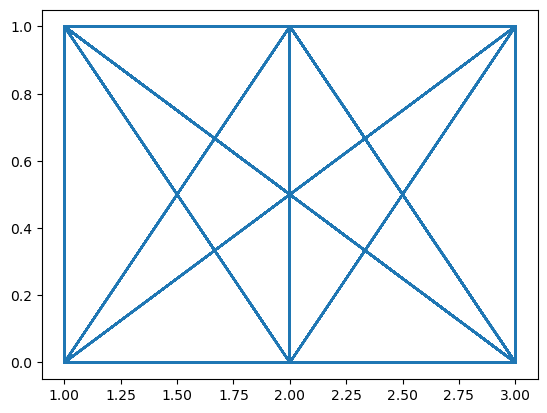

In [144]:
plt.plot(df['Pclass'],df['Survived'])
plt.show()

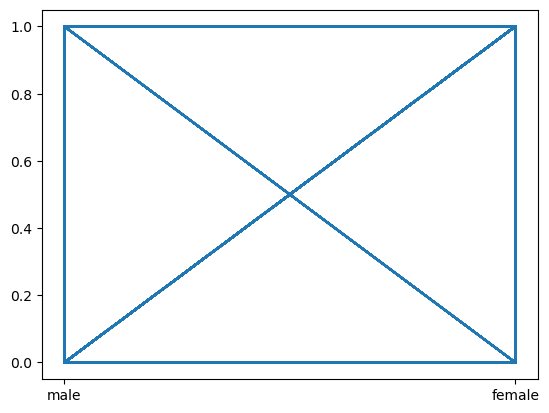

In [145]:
plt.plot(df['Sex'],df['Survived'])
plt.show()

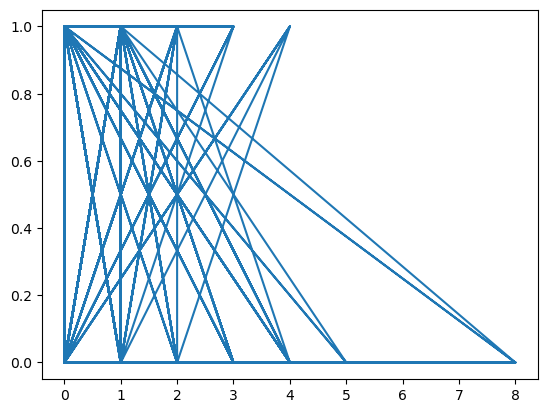

In [147]:
plt.plot(df['SibSp'],df['Survived'])
plt.show()

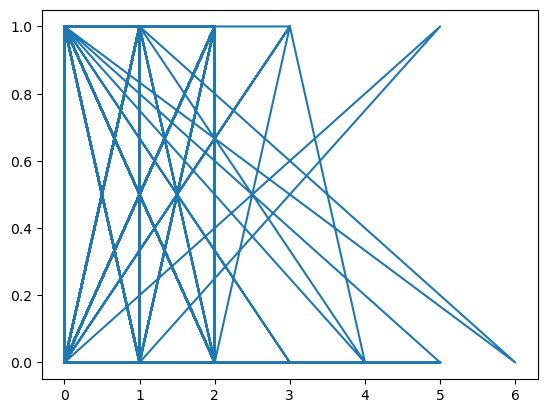

In [148]:
plt.plot(df['Parch'],df['Survived'])
plt.show()

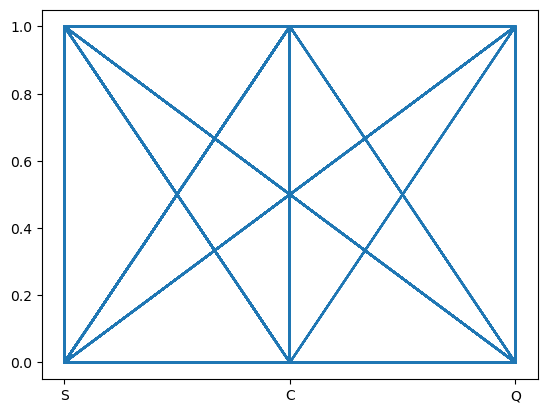

In [150]:
plt.plot(df['Embarked'],df['Survived'])
plt.show()

In [151]:
plt.style.use('dark_background') 

In [152]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

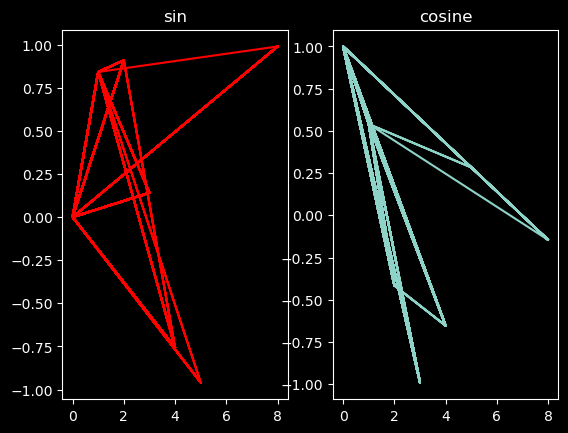

In [157]:
y_sin = np.sin(df['SibSp'])
y_cos = np.cos(df['SibSp']) 

plt.subplot(1,2,1)    
plt.plot(df['SibSp'],y_sin,'r') 
plt.title('sin')

plt.subplot(1,2,2)  
plt.plot(df['SibSp'],y_cos)
plt.title('cosine')
plt.show()

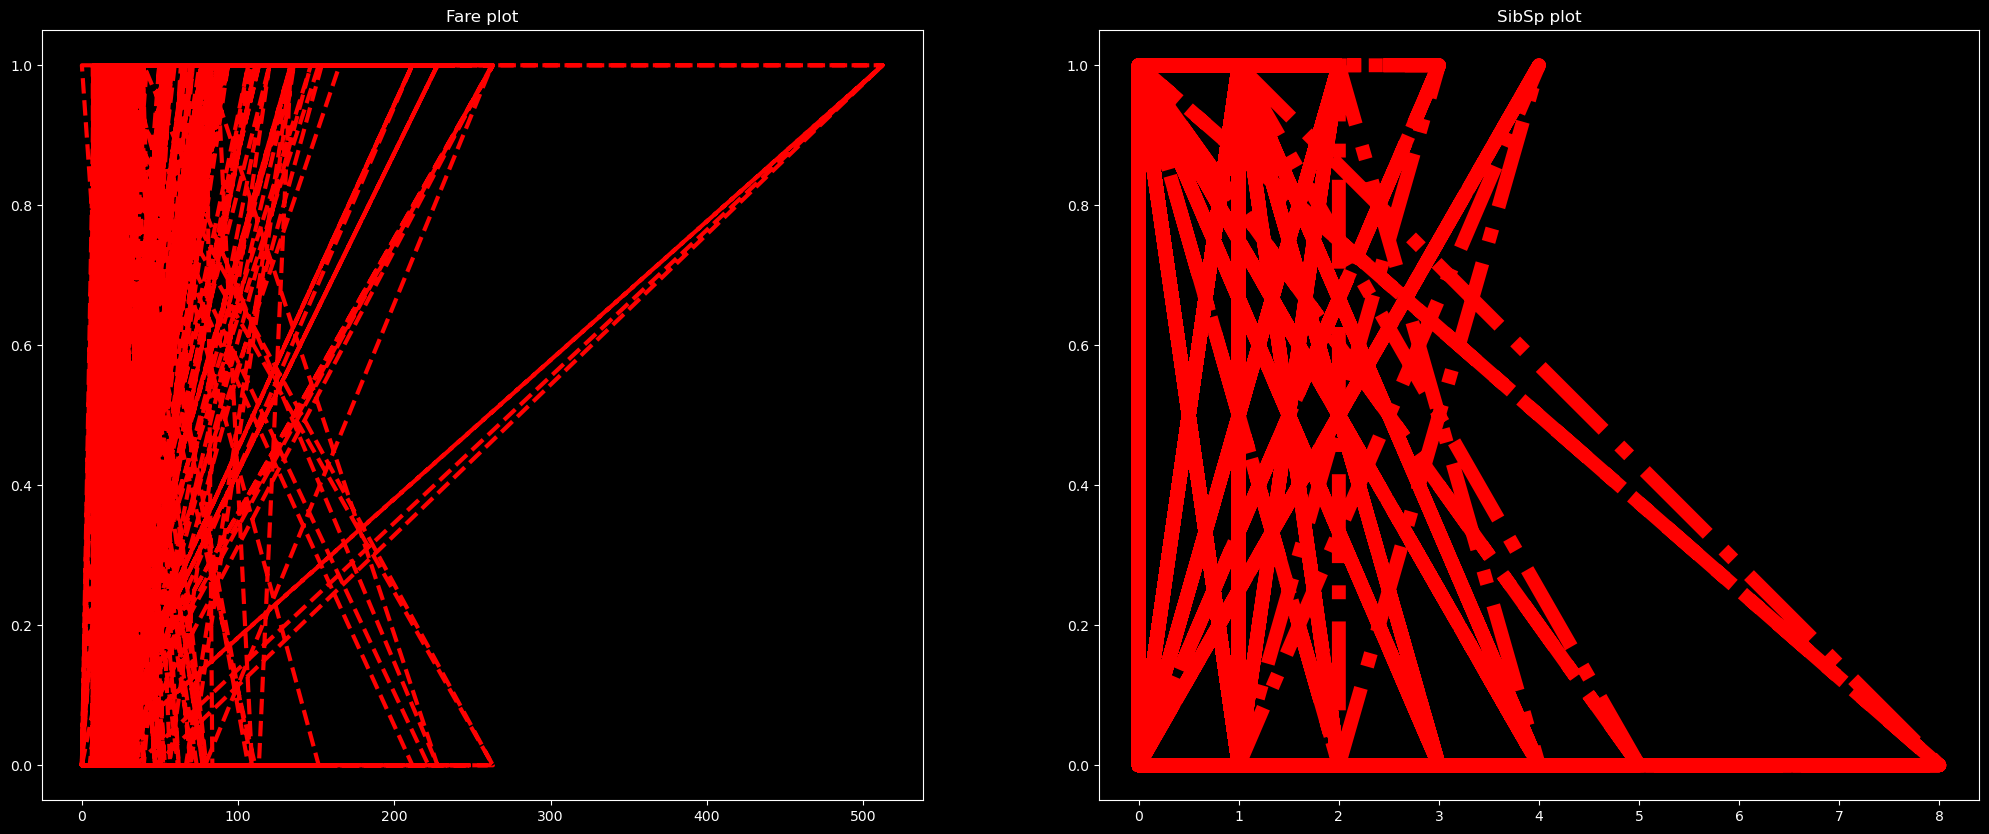

In [164]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.plot(df['Fare'],df['Survived'],color = 'r',linewidth = 3,linestyle = '--') 
plt.title('Fare plot')

plt.subplot(1,2,2)
plt.plot(df['SibSp'],df['Survived'],color = 'r',linewidth = 10,linestyle = '-.')
plt.title('SibSp plot')

plt.show()

In [165]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

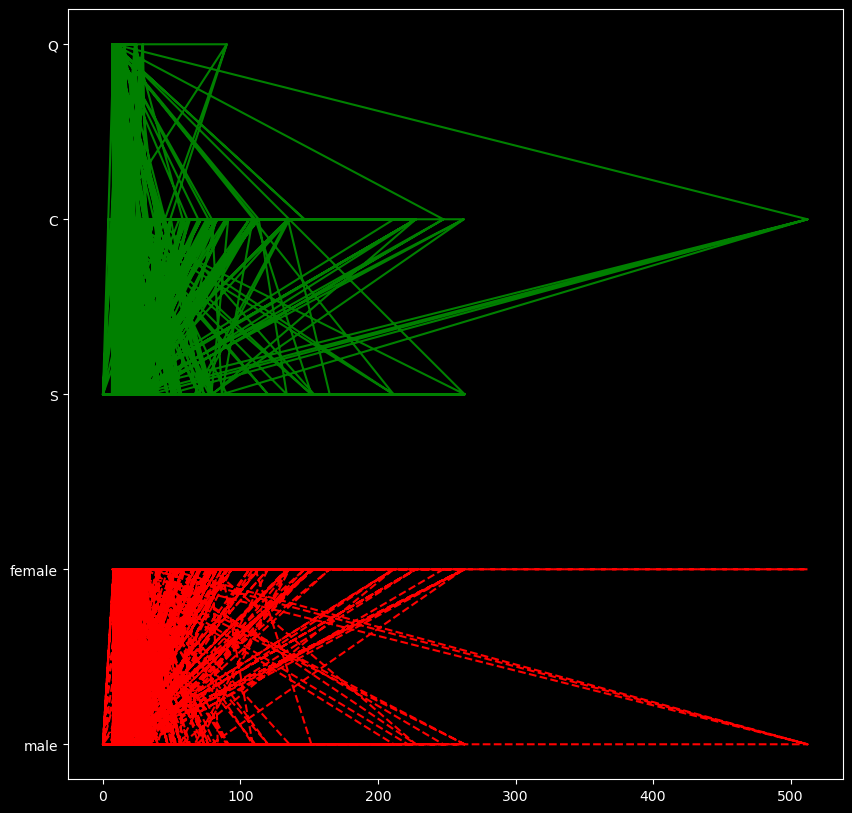

In [166]:
plt.figure(figsize=(10,10))
plt.plot(df['Fare'],df['Sex'],'r',linestyle = '--')
plt.plot(df['Fare'],df['Embarked'],'g',linestyle = '-')
plt.show()

In [182]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

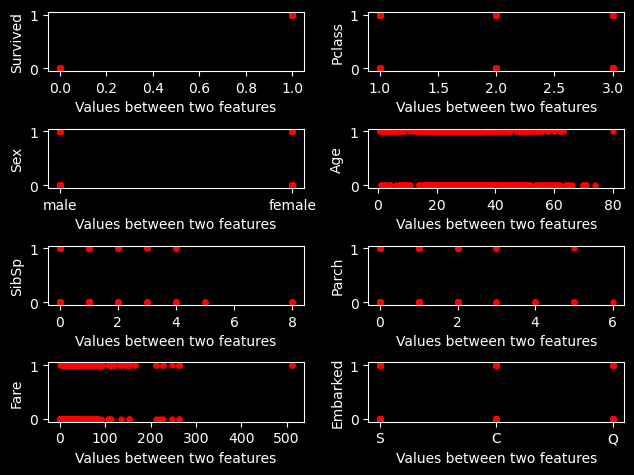

In [185]:
j = 1
for col in df.columns:
    plt.subplot(4,2,j)  # number of columns 9 , 3*3 = 9
    plt.scatter(df[col],df['Survived'],c='red',s=50,marker='.')
    plt.xlabel('Values between two features')
    plt.ylabel(col)
    j += 1
plt.tight_layout(pad = 0.9)
plt.show()    

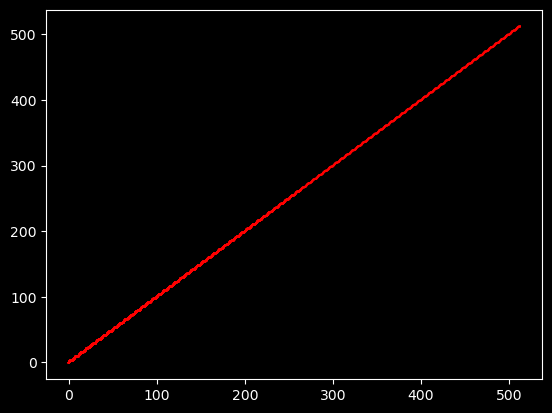

In [186]:
fig,axs = plt.subplots()  
x = np.linspace(0,df['Fare'],300)  
y = np.sin(x) + x
axs.plot(x,y,'r')
fig.show()

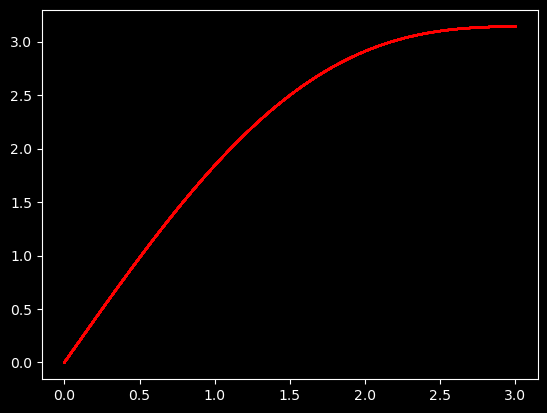

In [187]:
fig,axs = plt.subplots()  
x = np.linspace(0,df['Pclass'],300)  
y = np.sin(x) + x
axs.plot(x,y,'r')
fig.show()

In [190]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

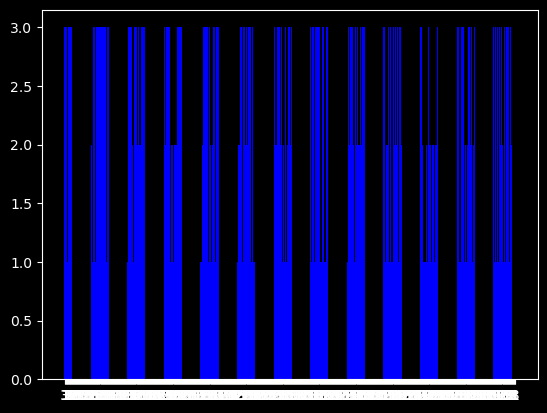

In [213]:
level = df['Pclass']
x = range(len(df['Pclass']))
y = df['Pclass'].value_counts()
plt.bar(x,df['Pclass'],width = 0.5,color = 'b') 
plt.xticks(x,level) 
plt.show()

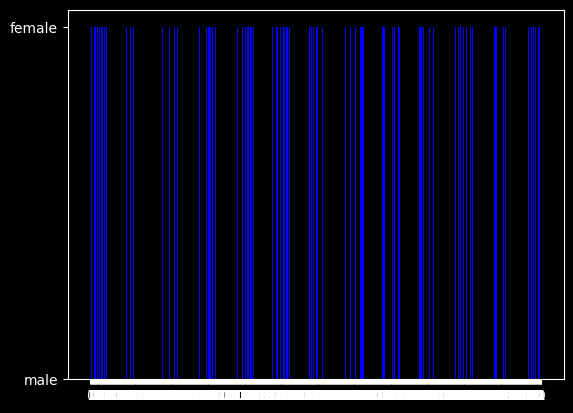

In [216]:
level = df['Survived']
x = range(len(df['Sex']))
y = df['Sex'].value_counts()
plt.bar(x,df['Sex'],width = 0.5,color = 'b') 
plt.xticks(x,level) 
plt.show()

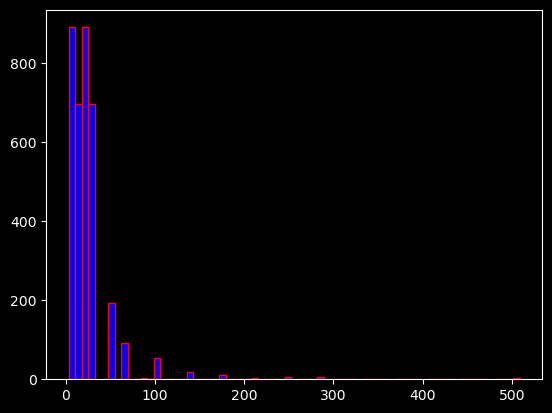

In [219]:
plt.hist(feature,facecolor = 'blue',edgecolor = 'red',bins = 14) # bins is number of bar is 14 
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

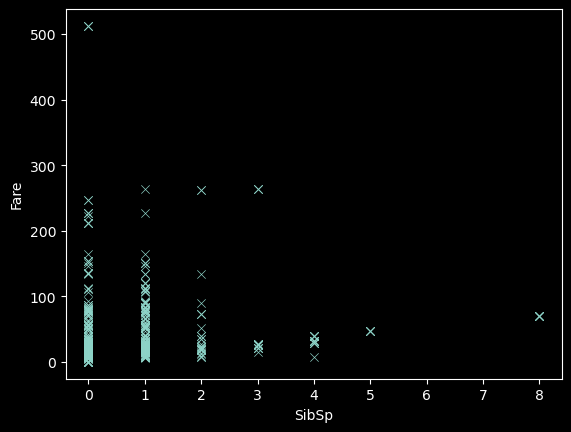

In [221]:
sns.scatterplot(x = 'SibSp',y = 'Fare',data = df,marker = 'x')

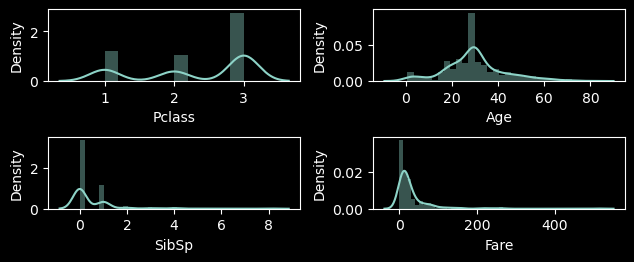

In [223]:
i = 1
for col in feature:
    plt.subplot(4,2,i)  # number of columns 9 , 3*3 = 9
    sns.distplot(df[col])
    
    i += 1
plt.tight_layout(pad = 0.9)
plt.show()

In [224]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='Density'>

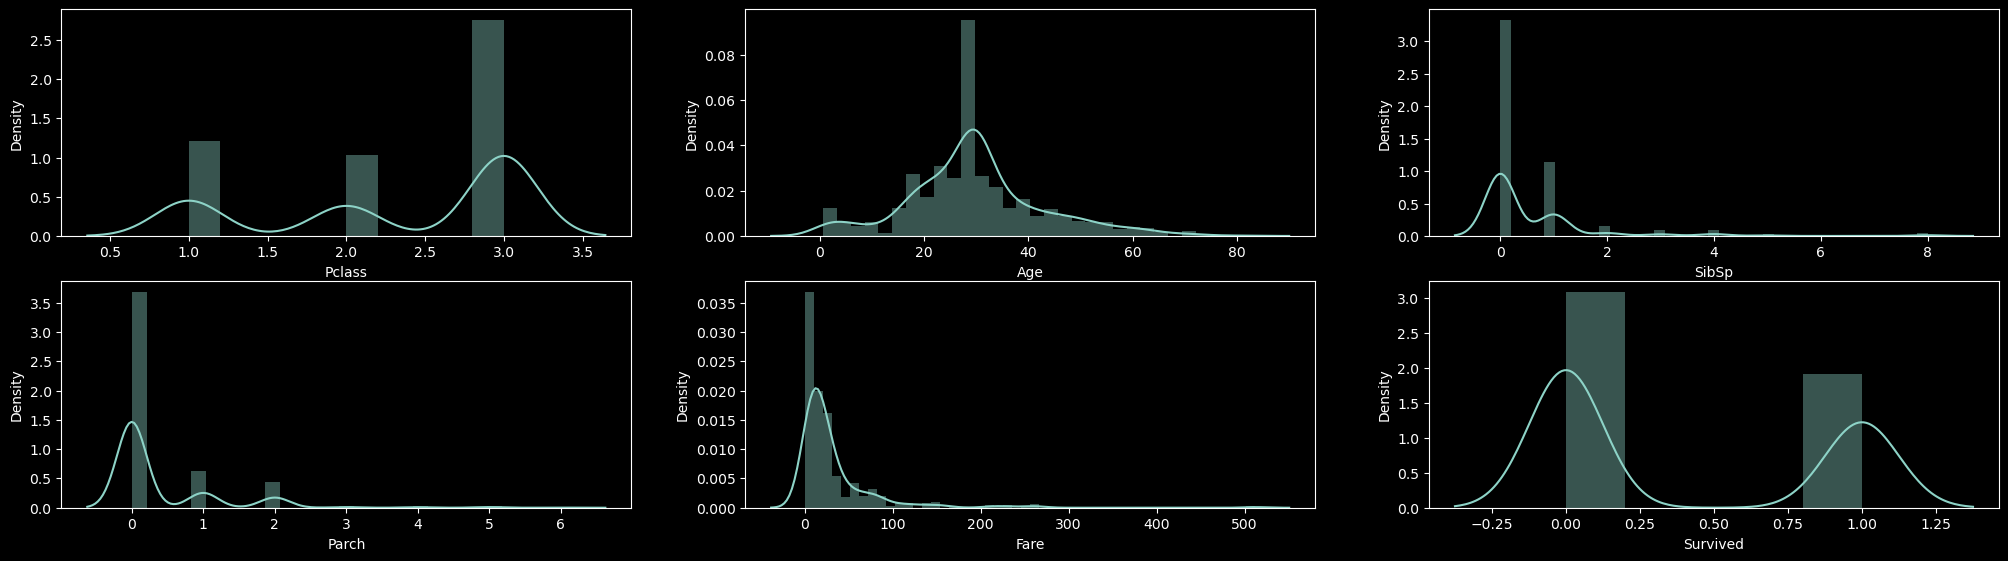

In [228]:
plt.figure(figsize = (25,10))

plt.subplot(3,3,1)
sns.distplot(df['Pclass'])


plt.subplot(3,3,2)
sns.distplot(df['Age'])

plt.subplot(3,3,3)
sns.distplot(df['SibSp'])

plt.subplot(3,3,4)
sns.distplot(df['Parch'])

plt.subplot(3,3,5)
sns.distplot(df['Fare'])


plt.subplot(3,3,6)
sns.distplot(df['Survived'])


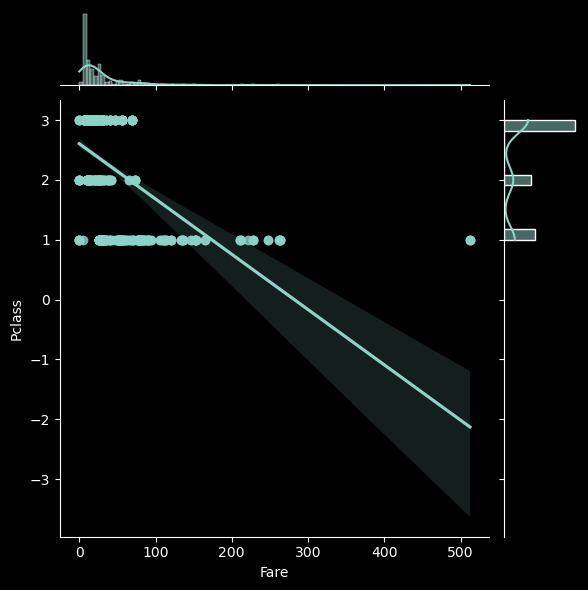

In [229]:
sns.jointplot(x = 'Fare',y = 'Pclass',data = df,kind = 'reg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


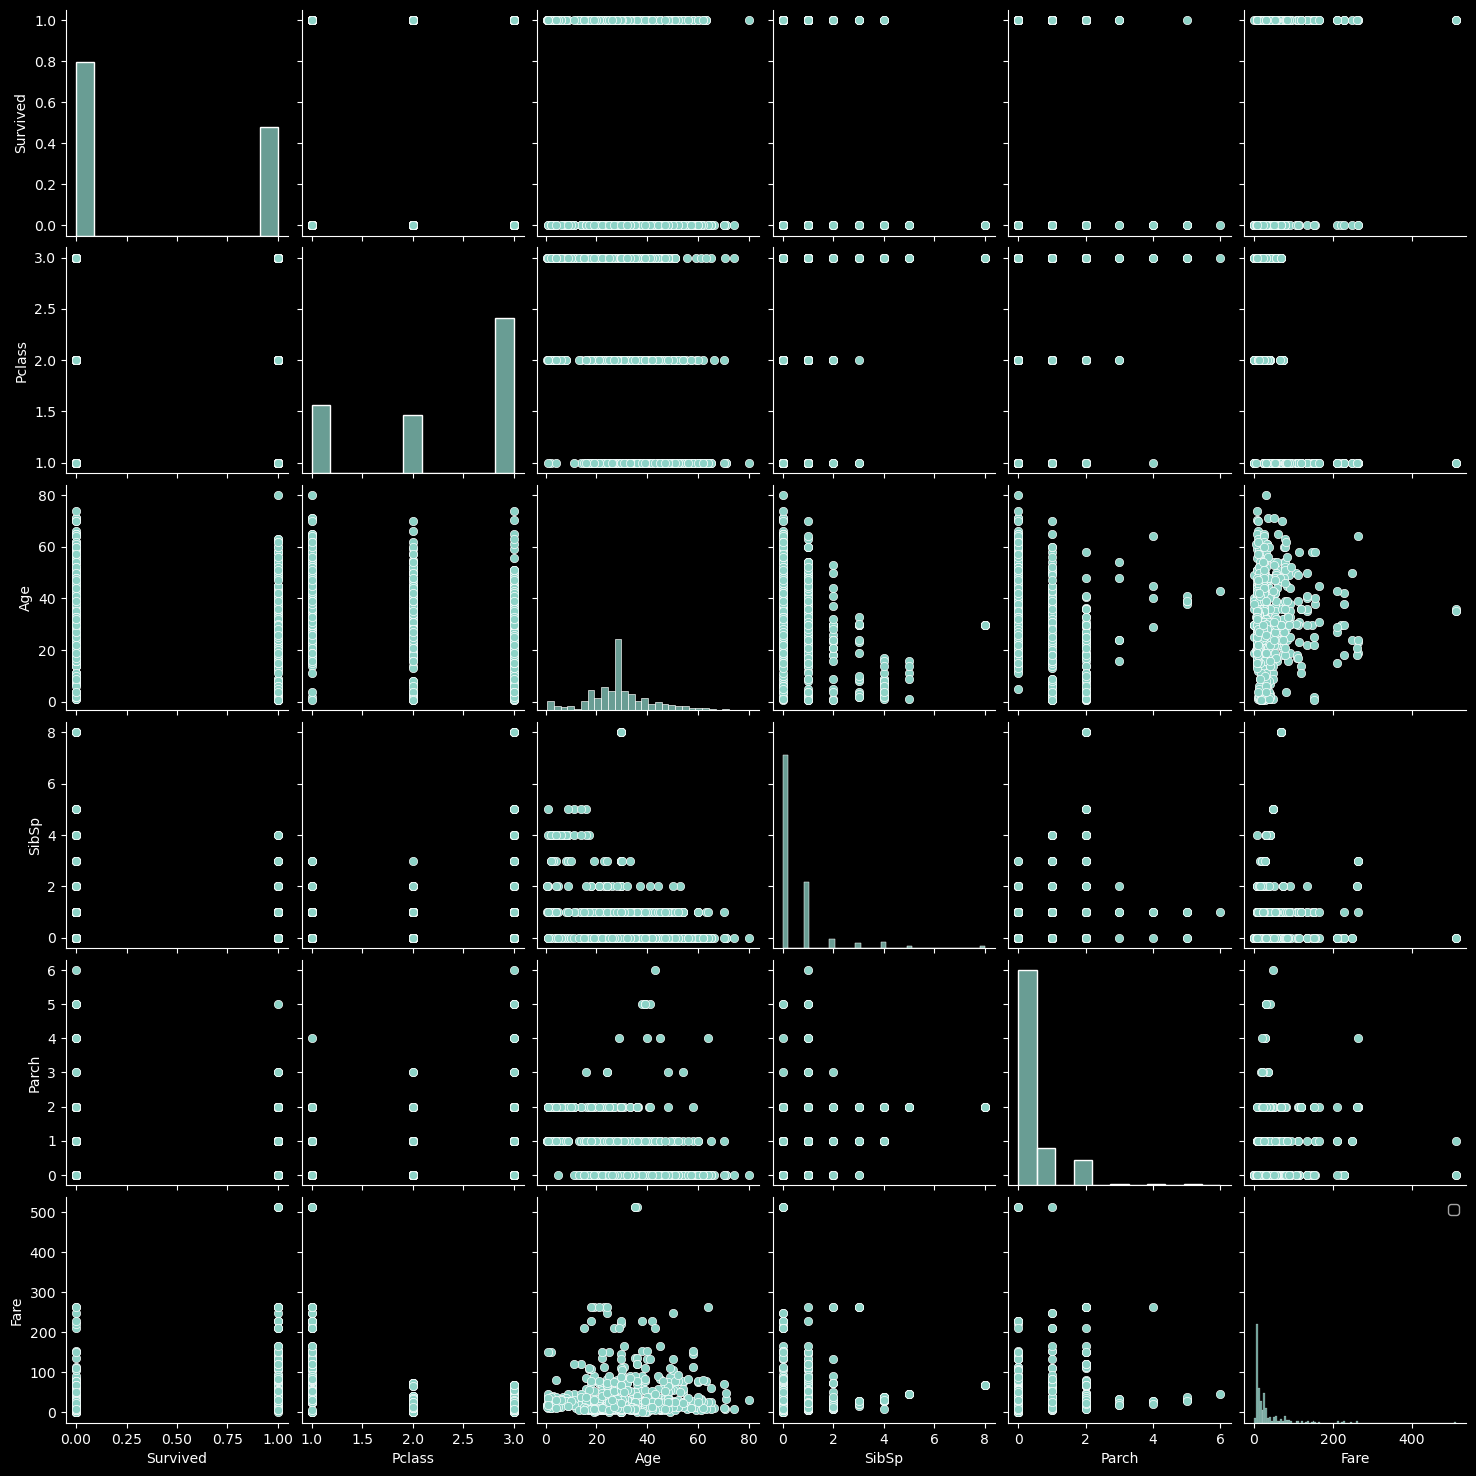

In [230]:
sns.pairplot(df)
plt.legend()

<AxesSubplot:>

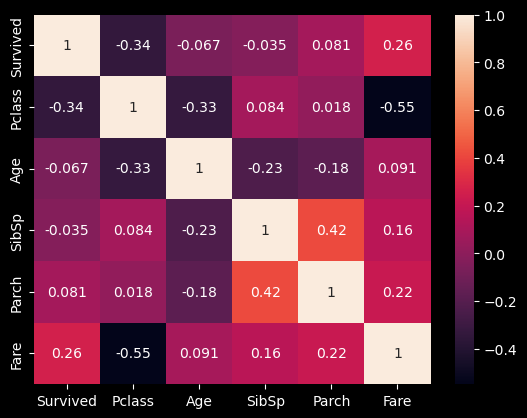

In [231]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

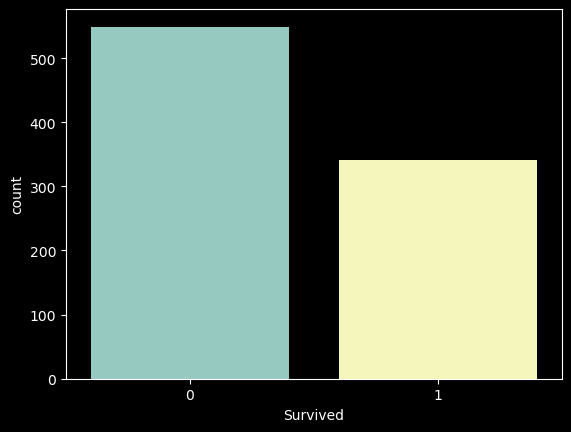

In [232]:
sns.countplot(x = 'Survived',data = df)

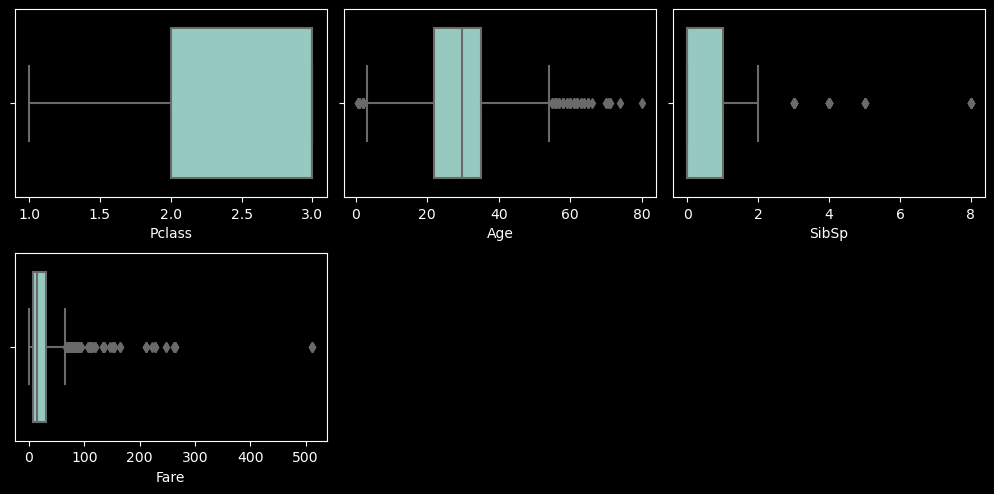

In [234]:
plt.figure(figsize = (10,7))
i = 1
for col in feature:
    plt.subplot(3,3,i)
    sns.boxplot(df[col])
    plt.tight_layout(pad = 0.9)
    i += 1

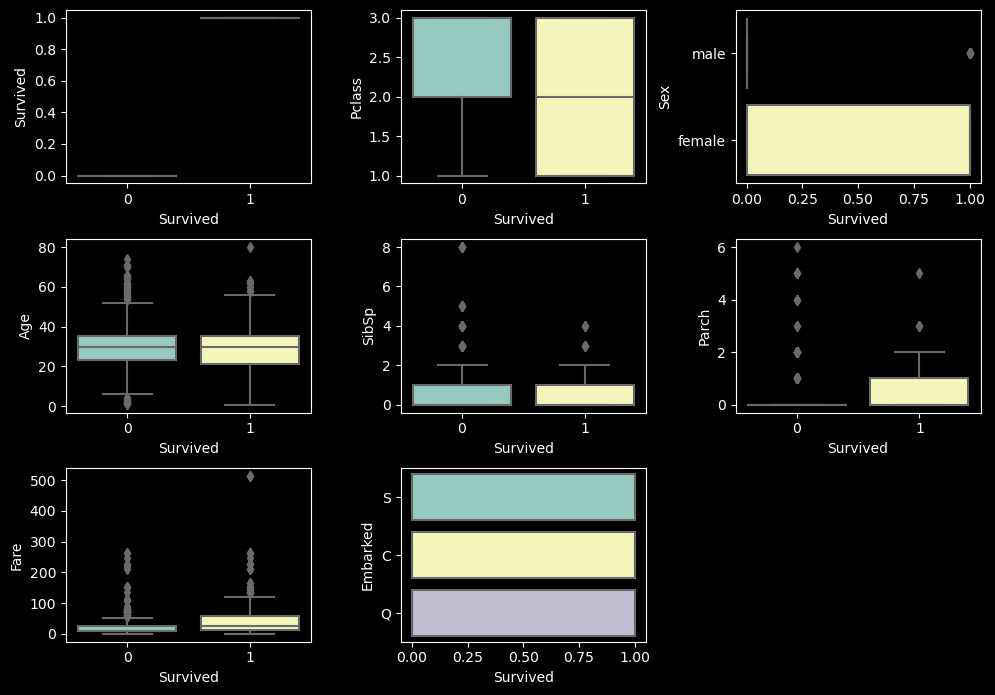

In [235]:
plt.figure(figsize = (10,7))
i = 1
for col in df.columns:
    plt.subplot(3,3,i)
    sns.boxplot(x = 'Survived',y = col,data = df)
    plt.tight_layout(pad = 0.9)
    i += 1